Mounted at /content/drive


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipython-input-1-236810211.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10)) # figsize(10,10): 고해상도 저장


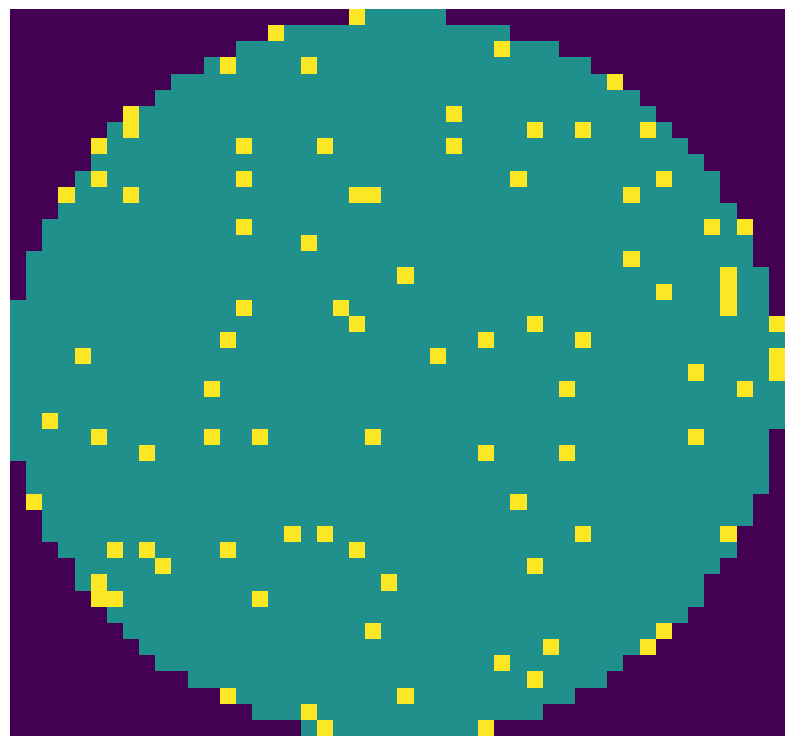

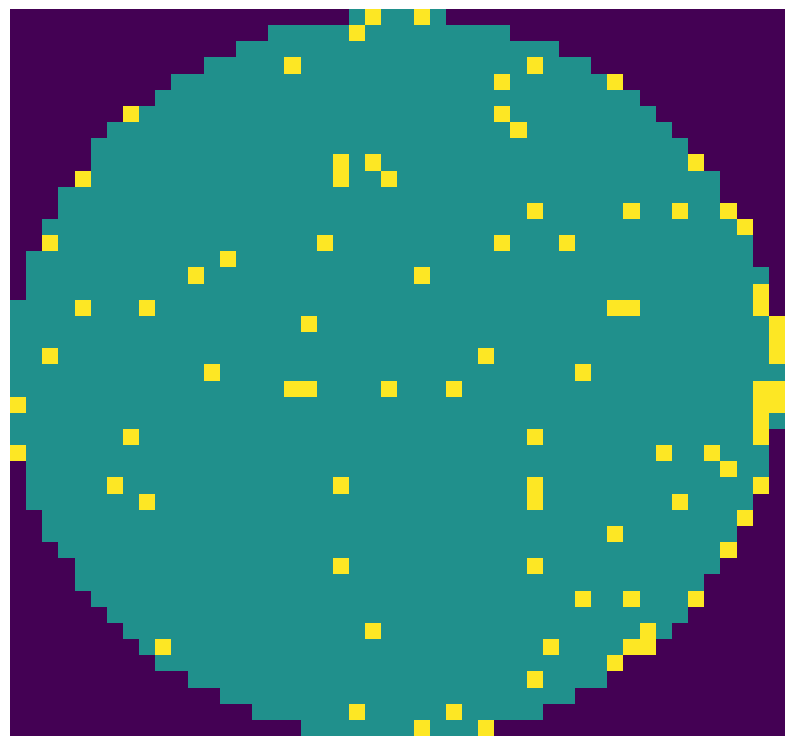

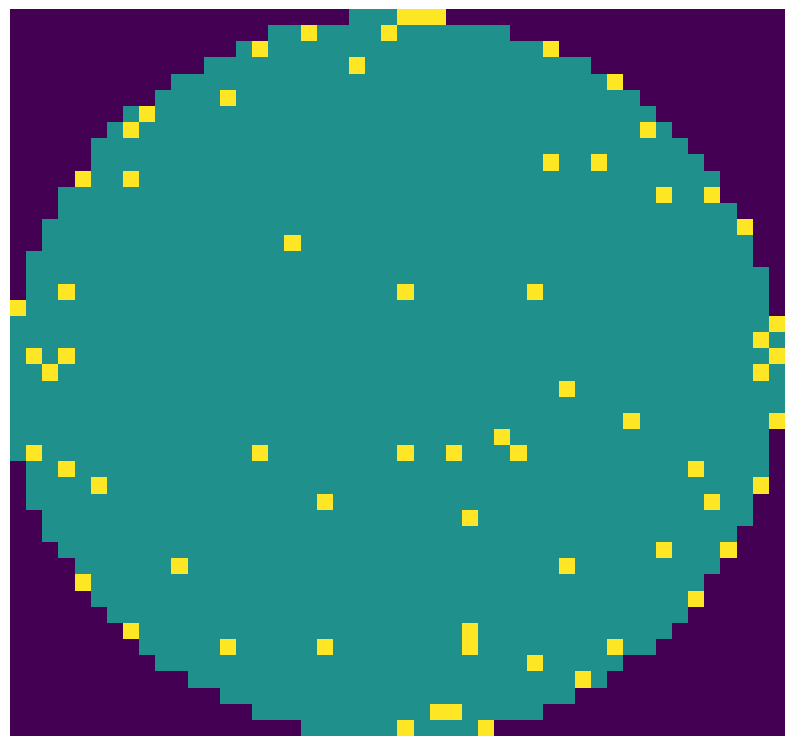

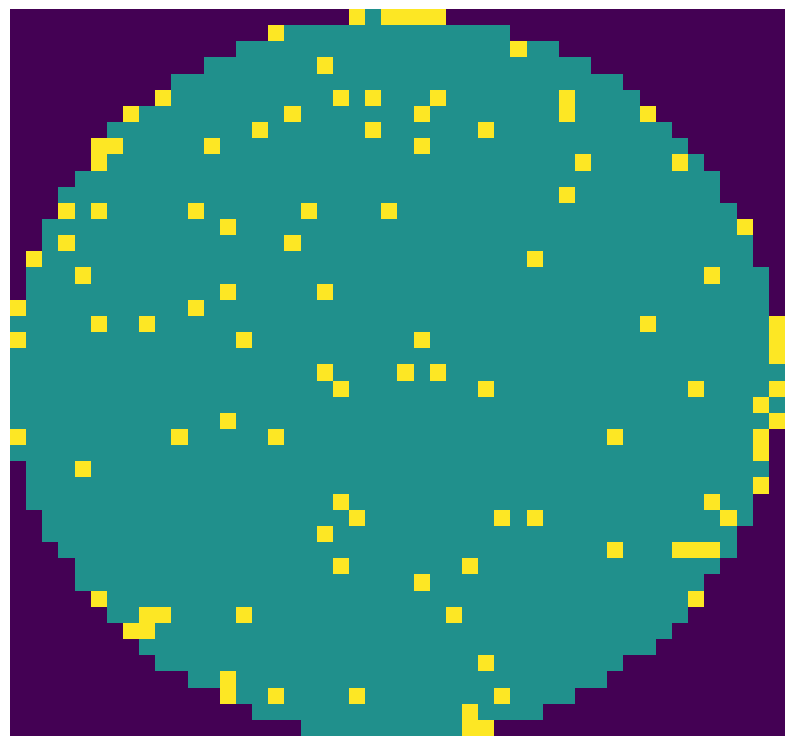

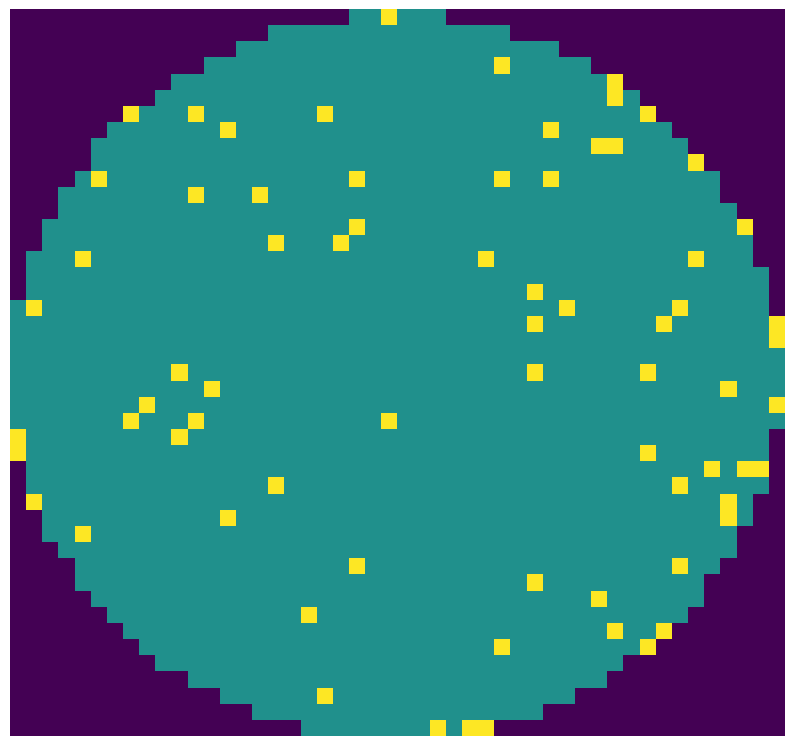

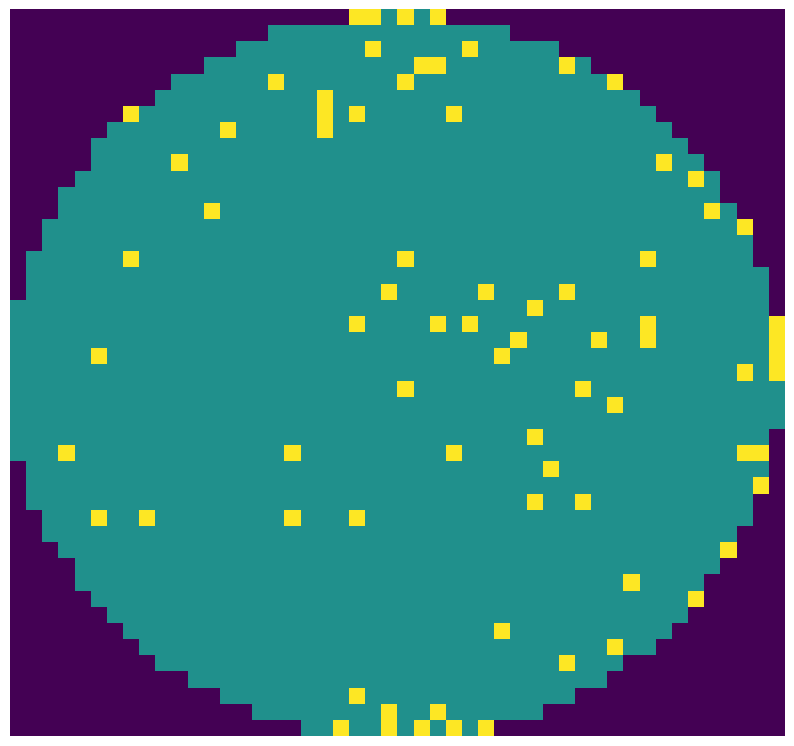

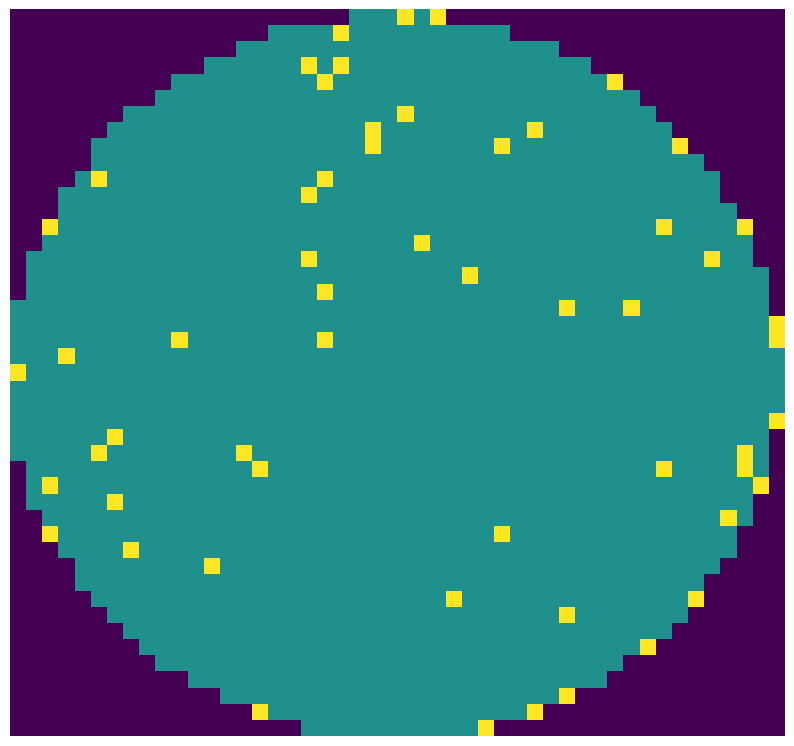

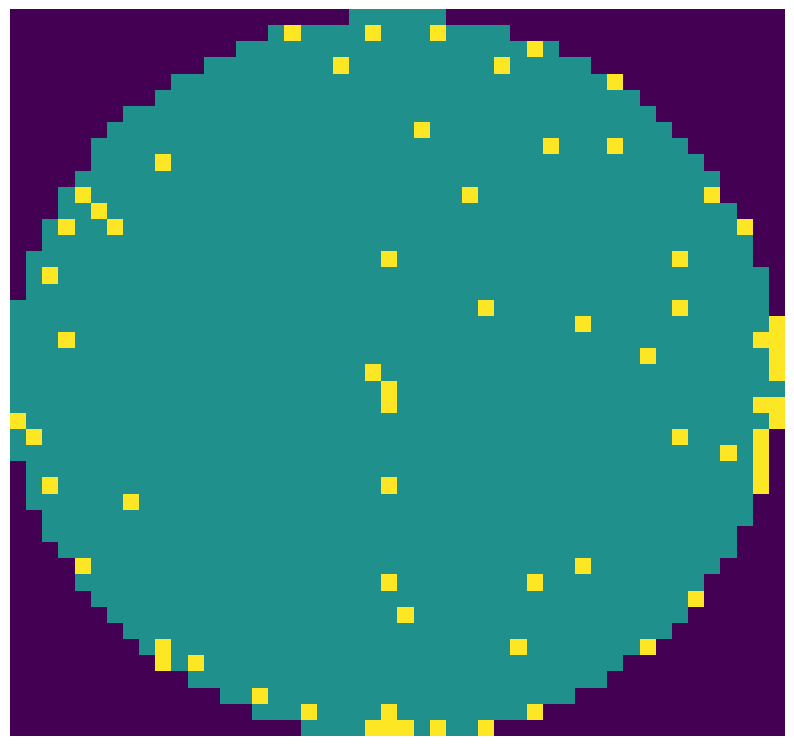

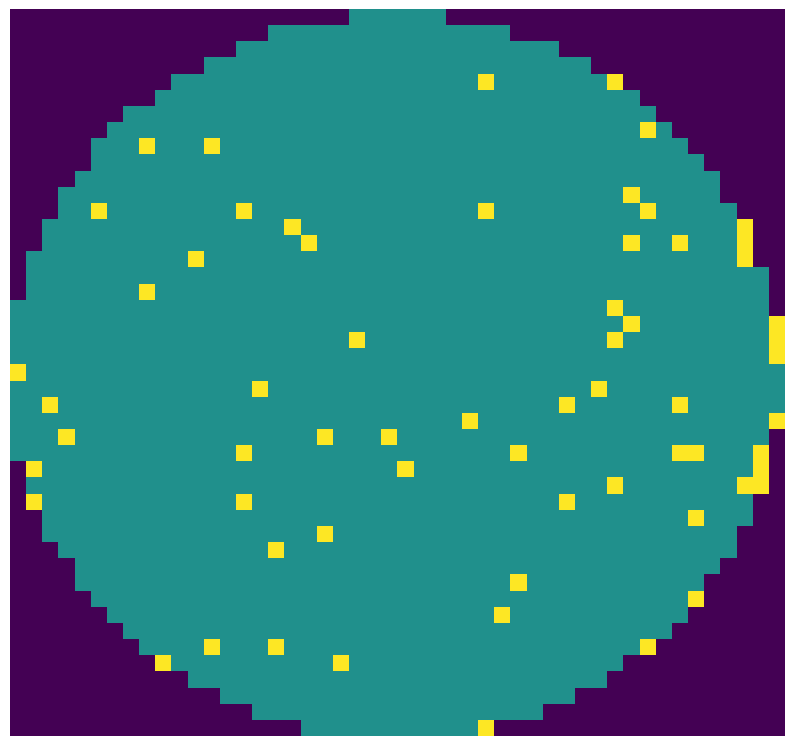

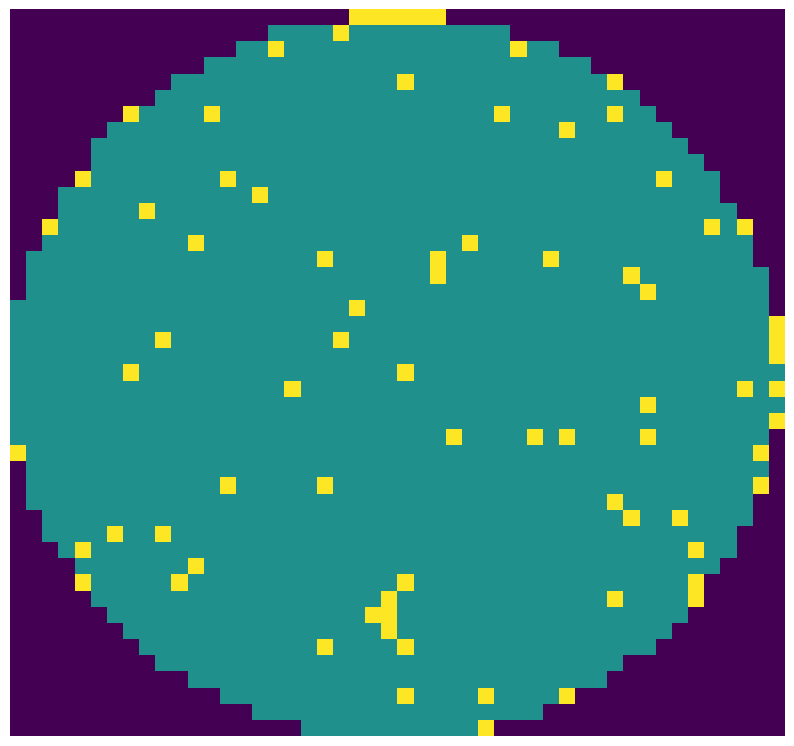

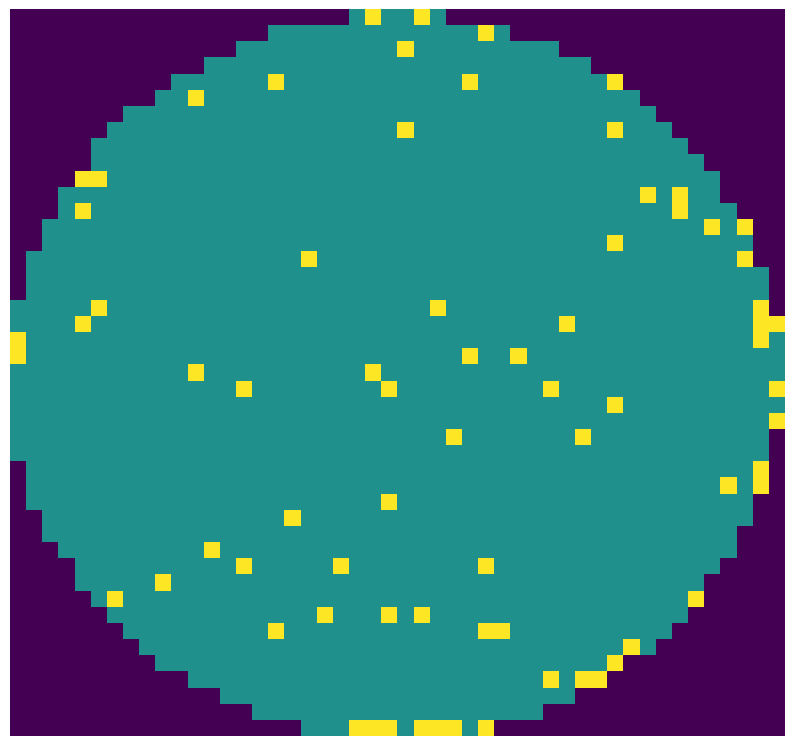

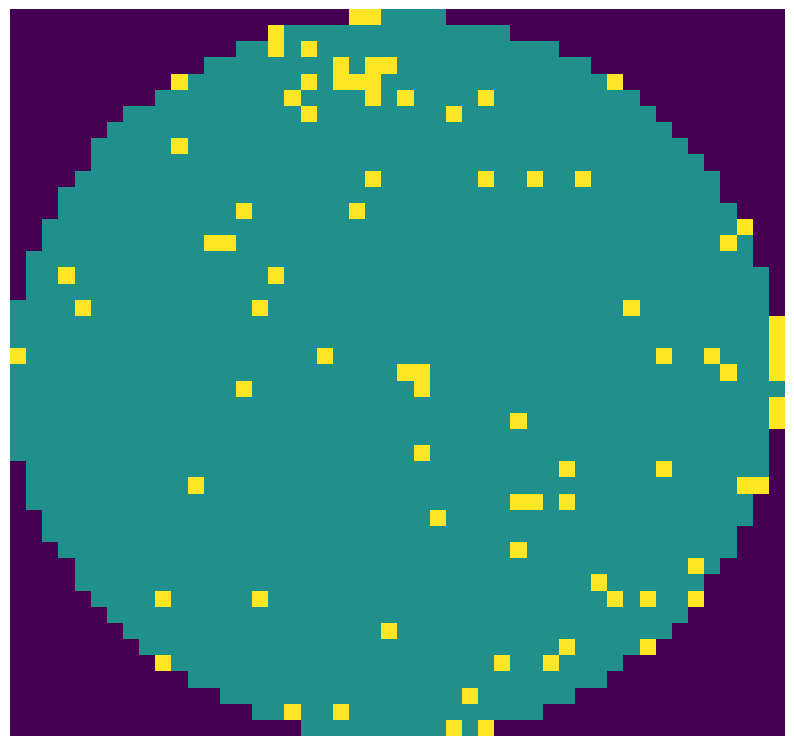

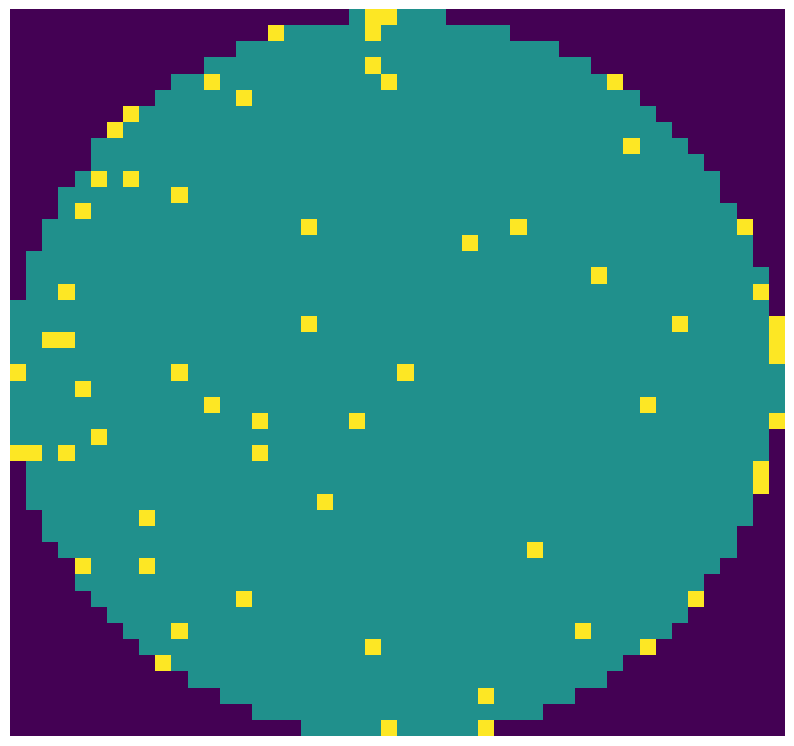

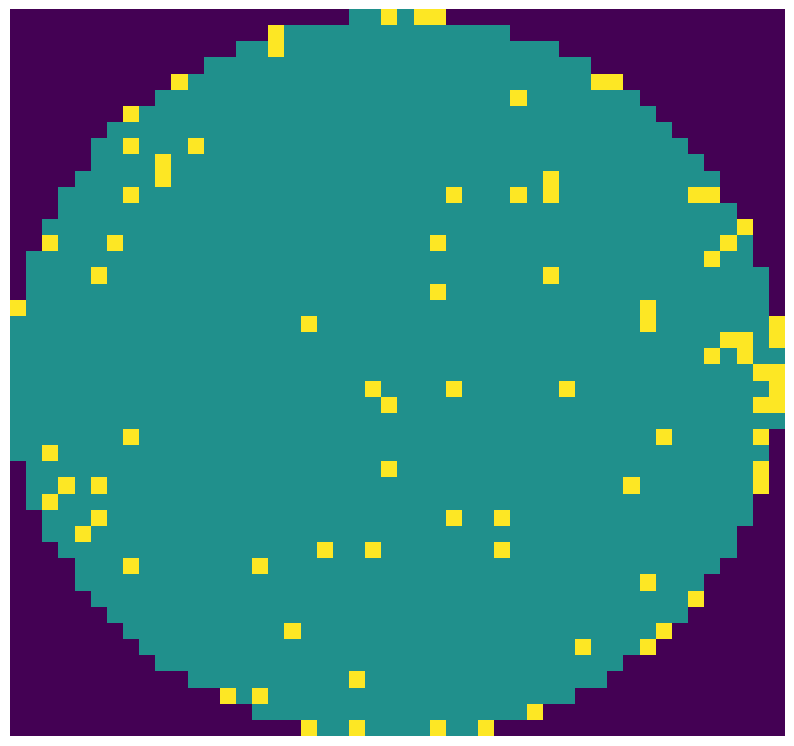

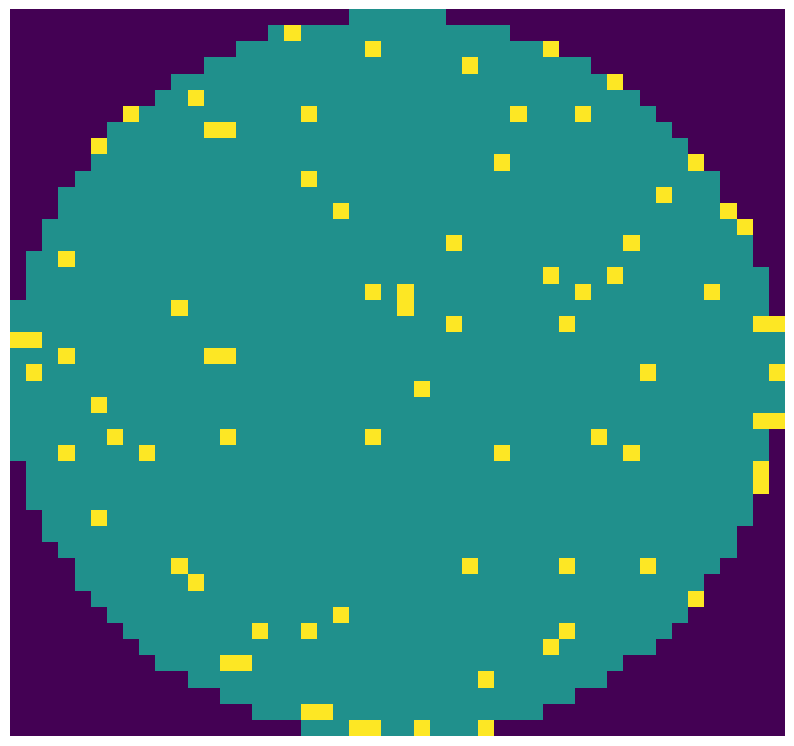

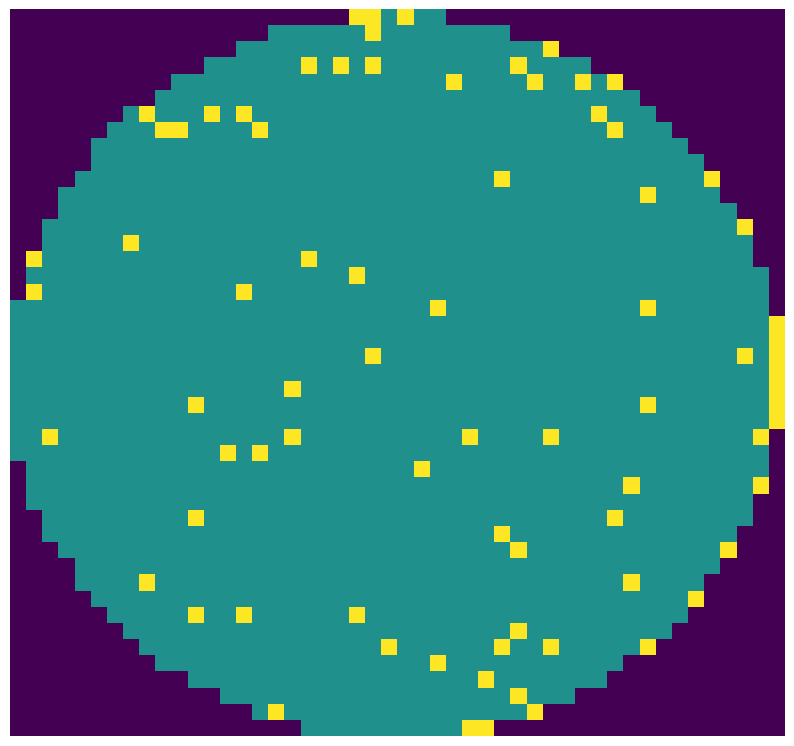

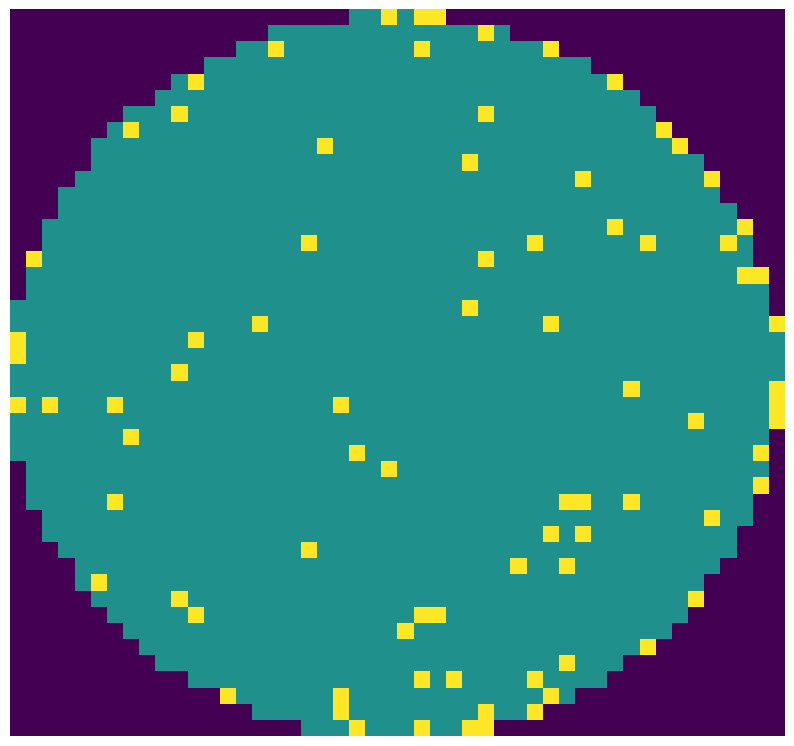

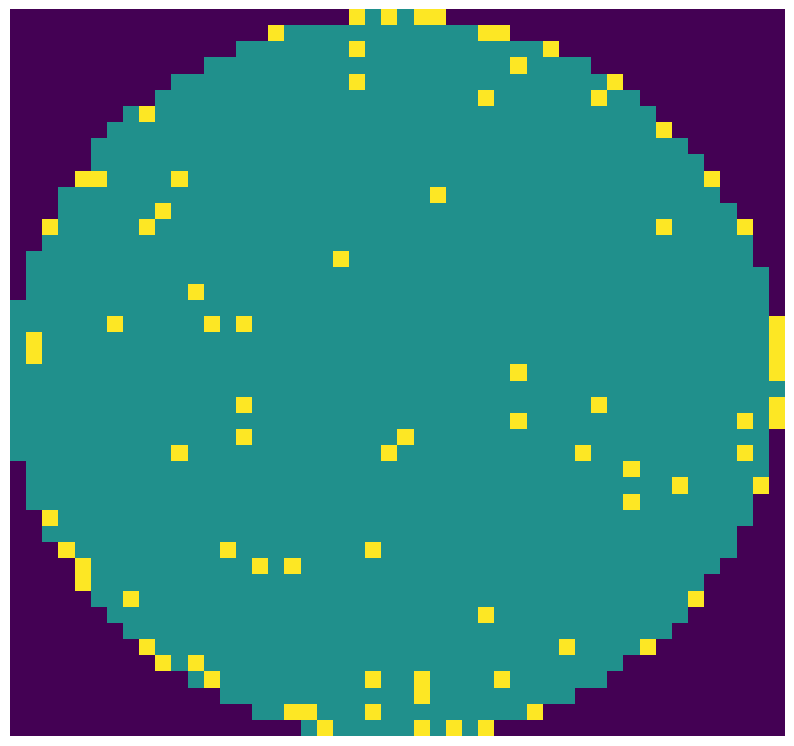

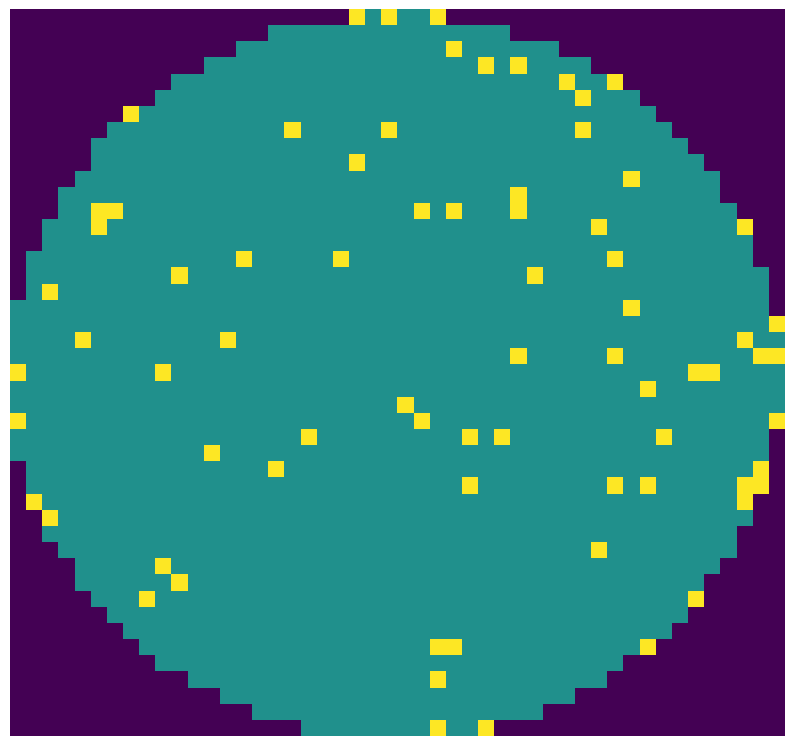

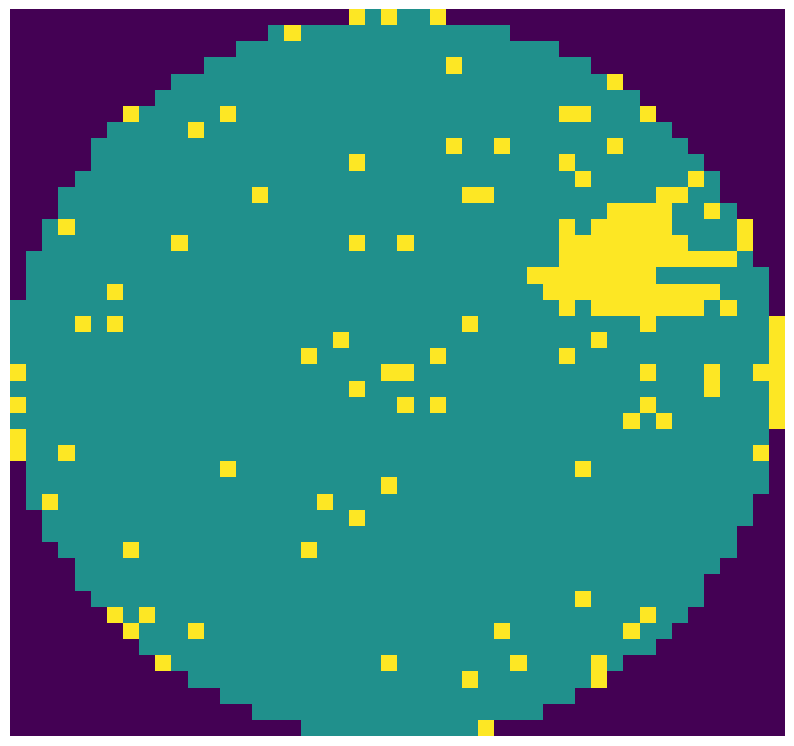

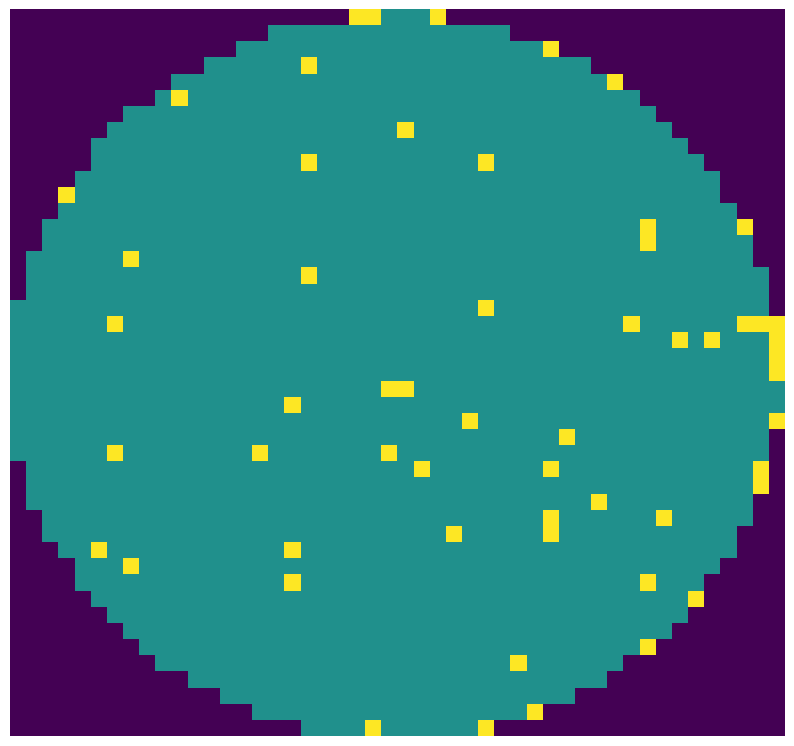

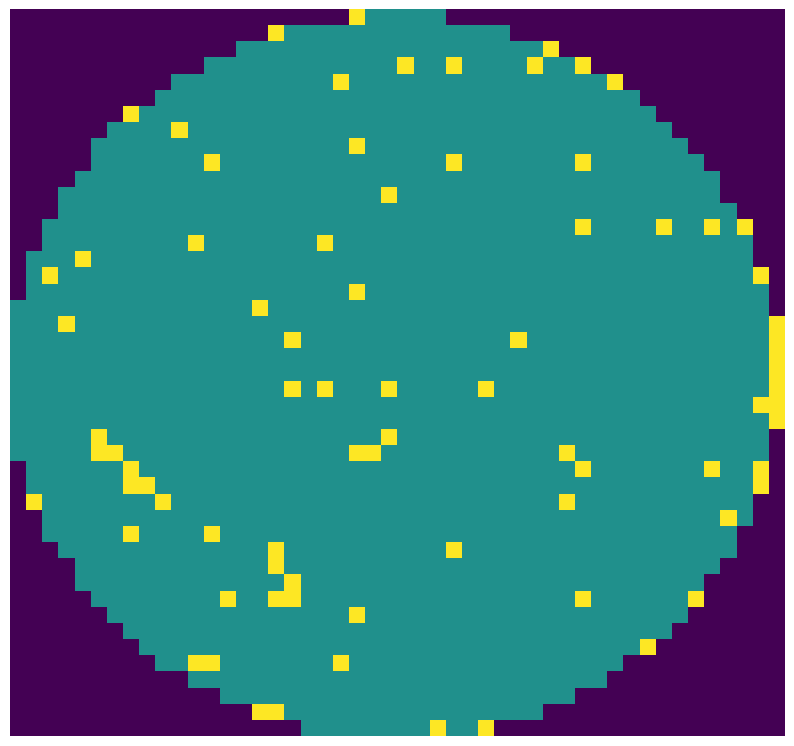

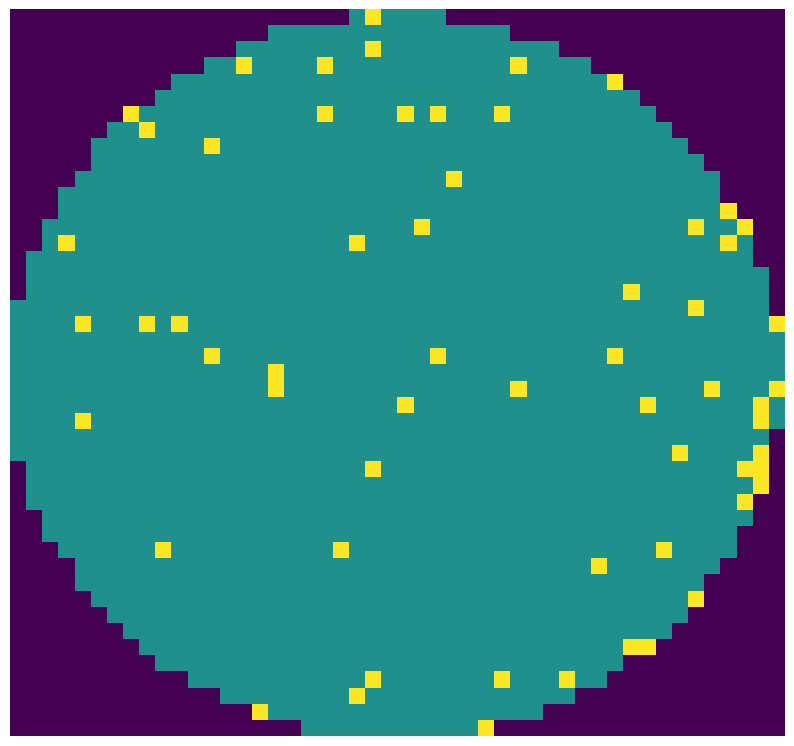

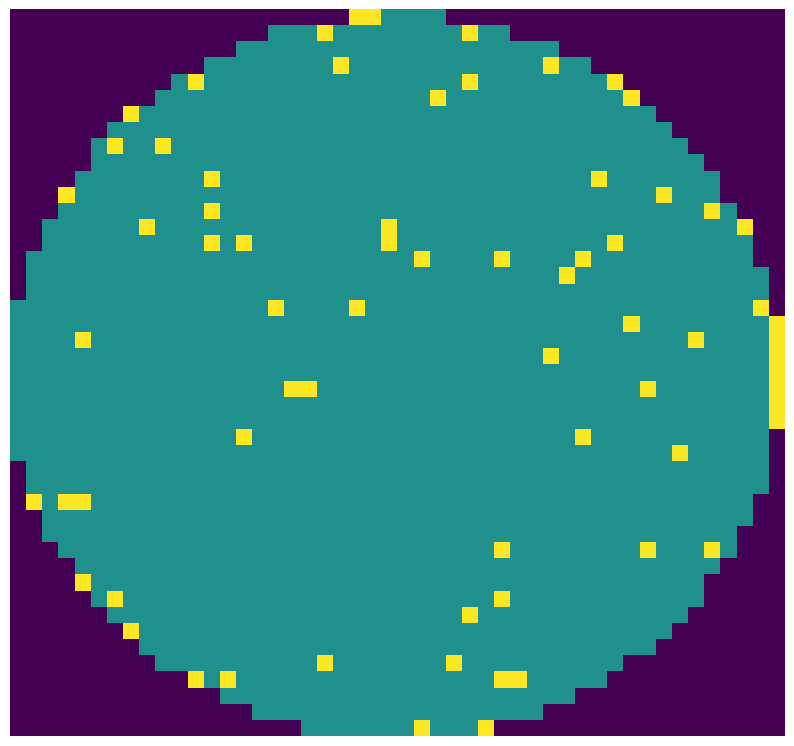

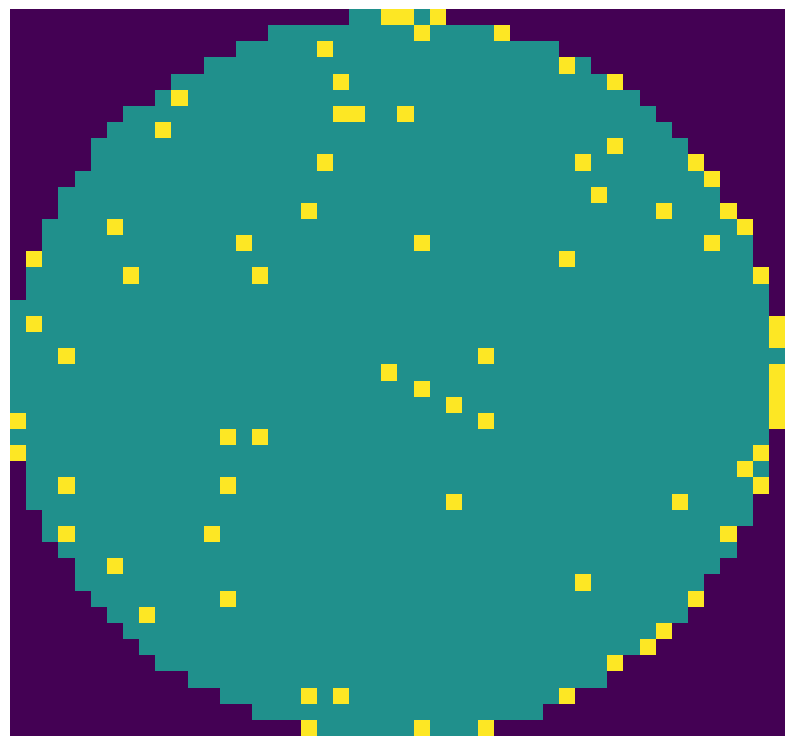

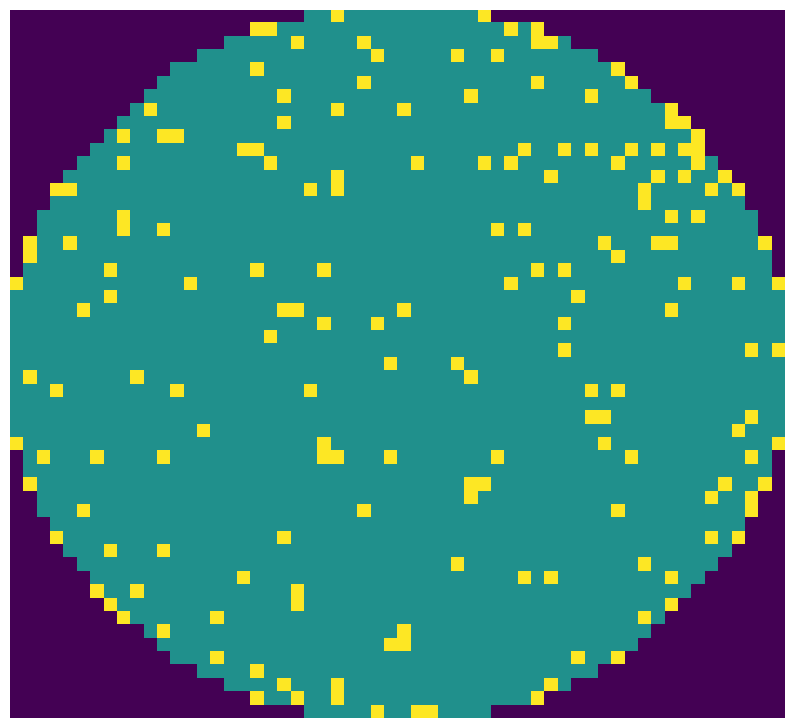

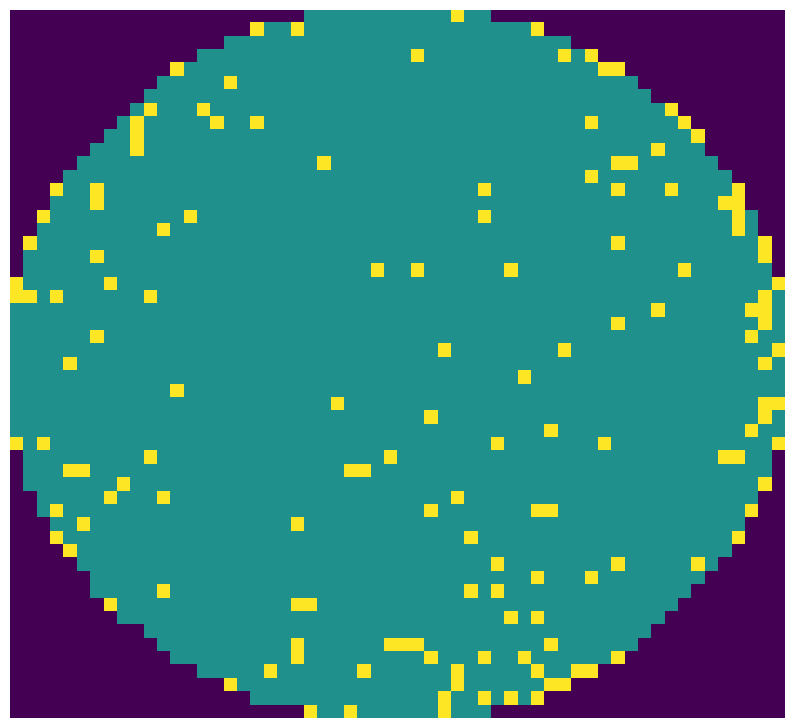

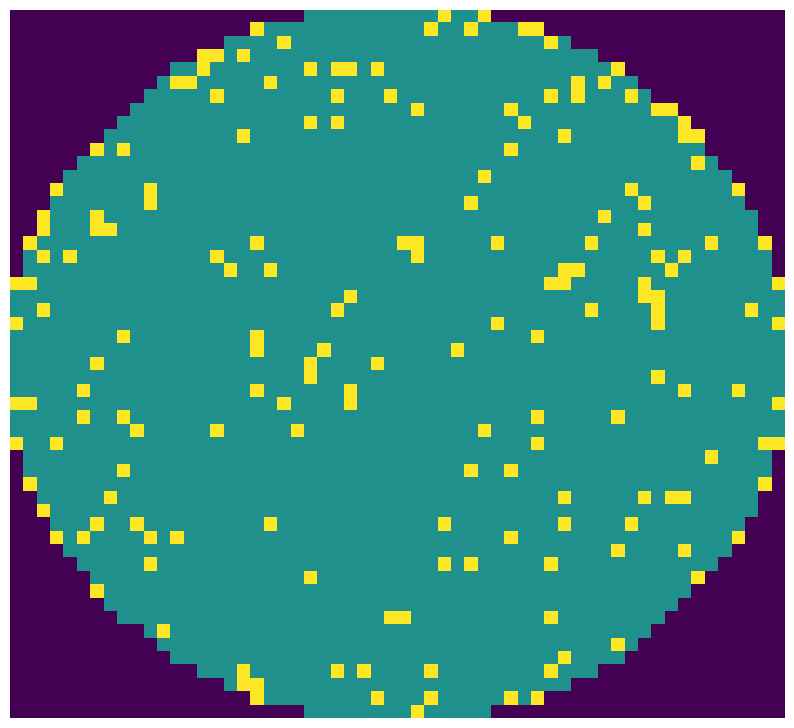

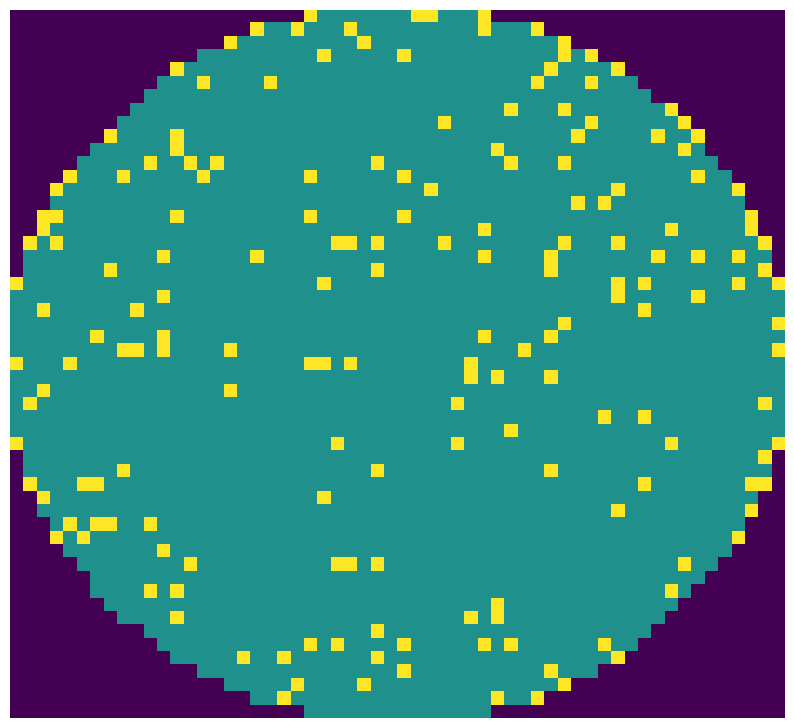

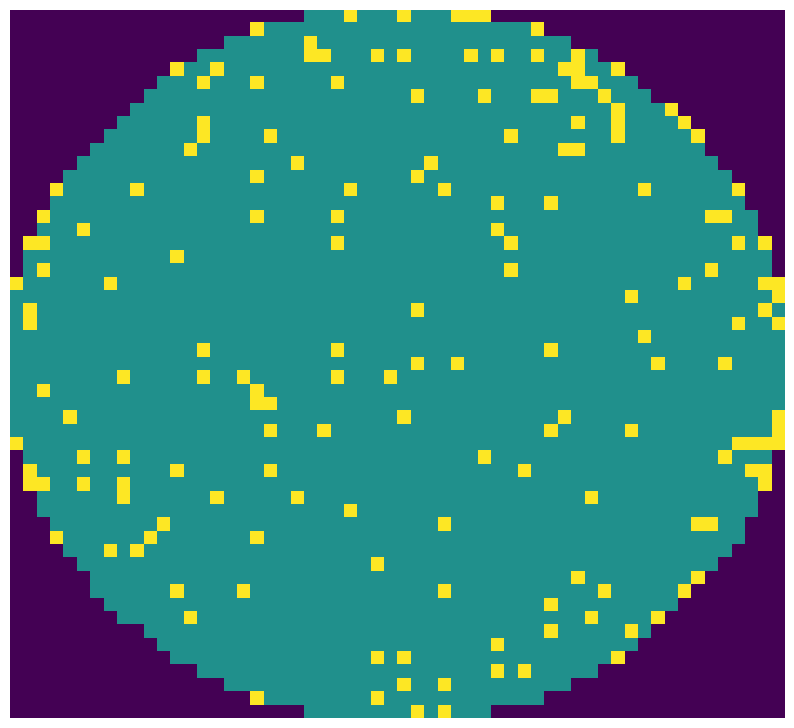

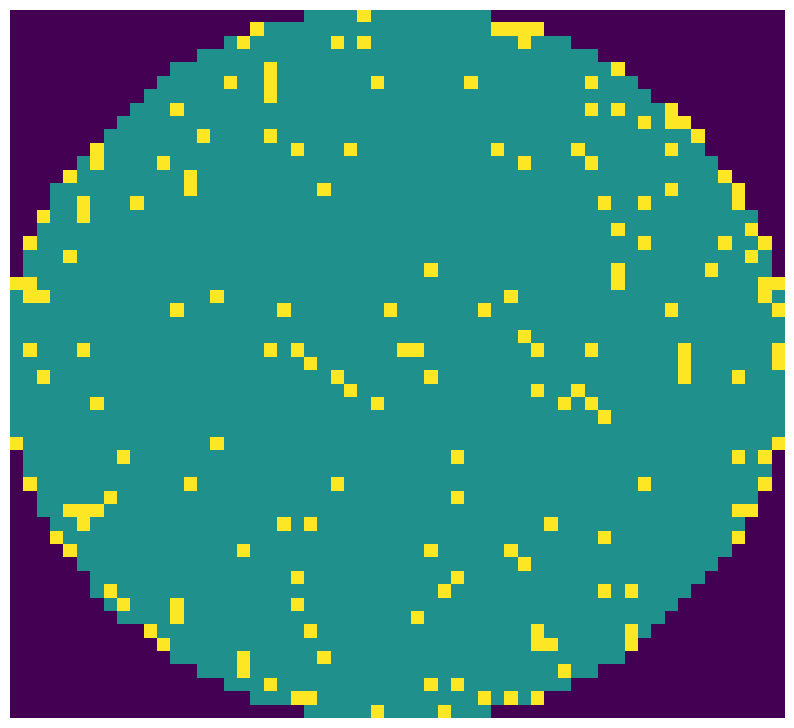

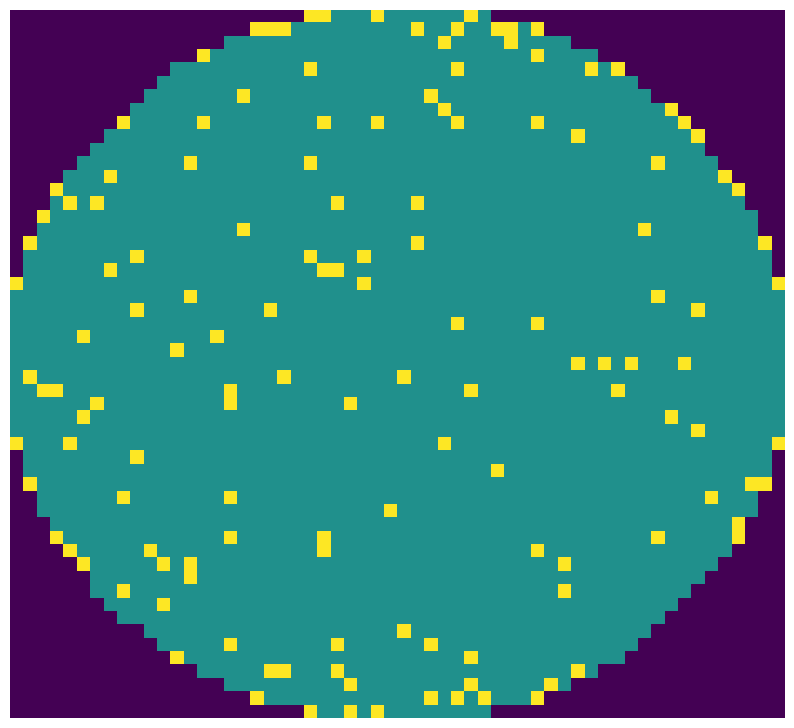

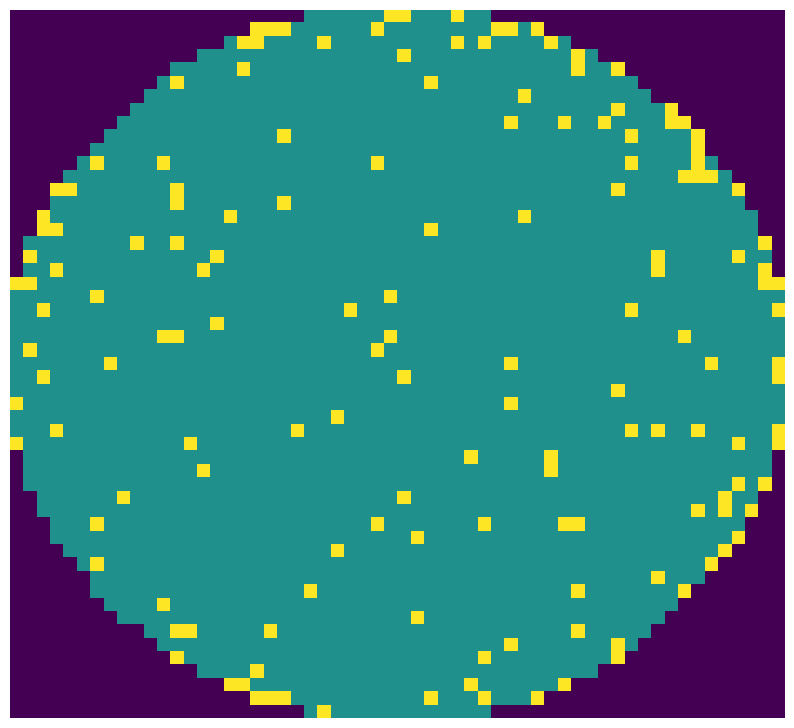

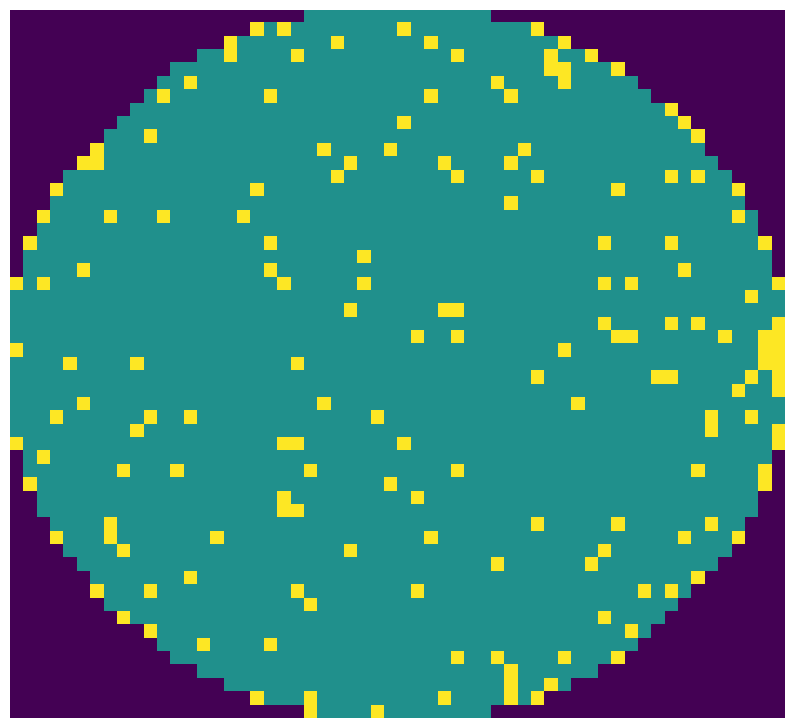

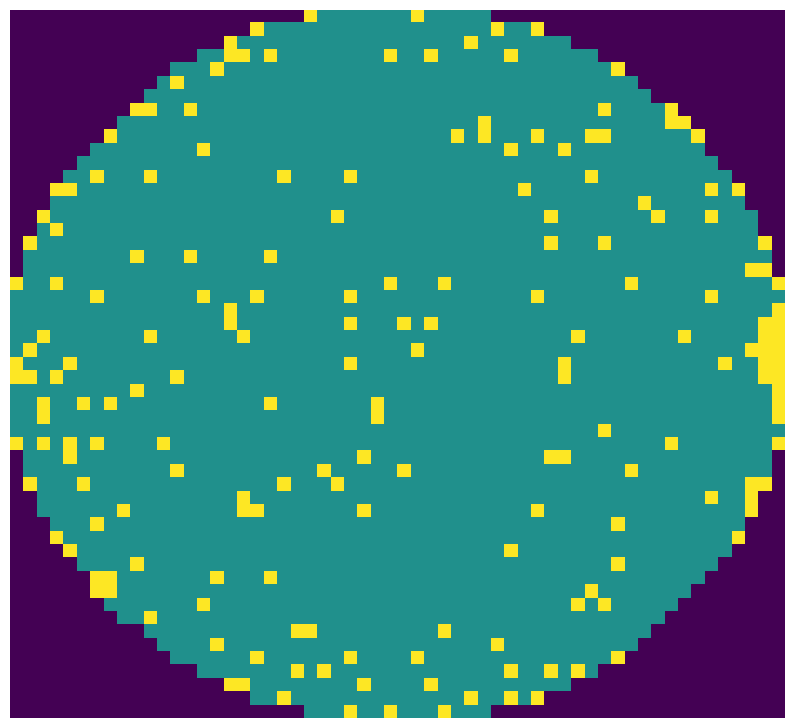

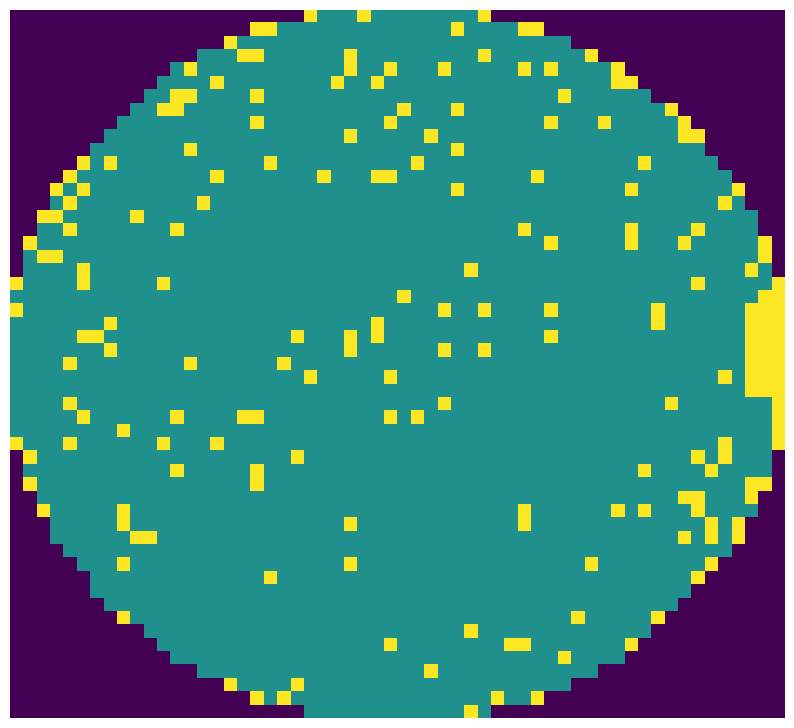

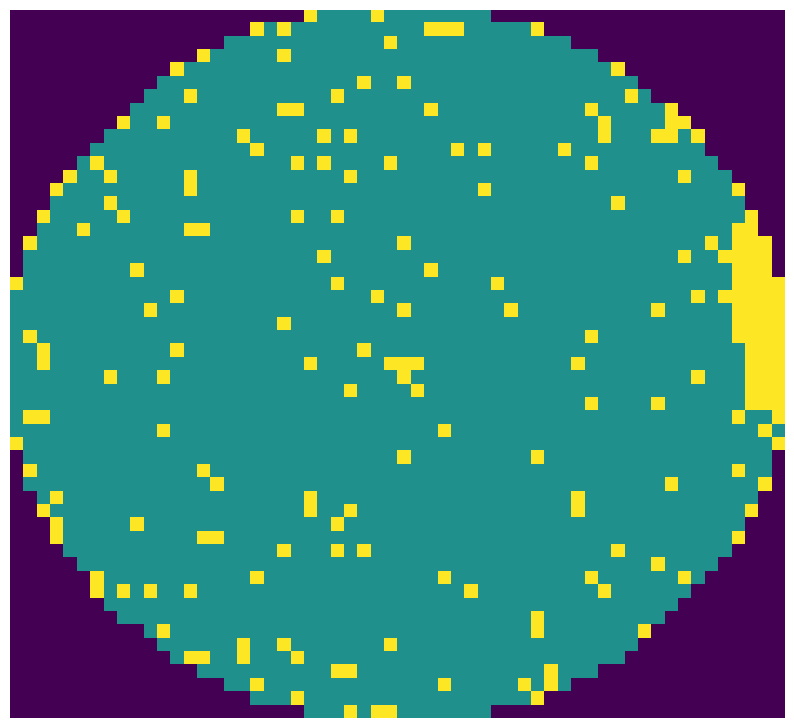

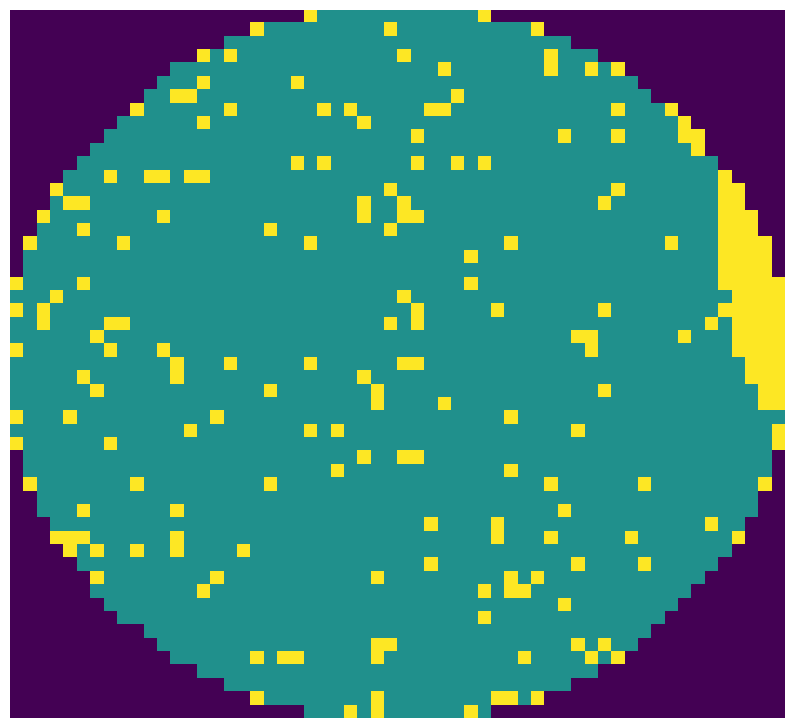

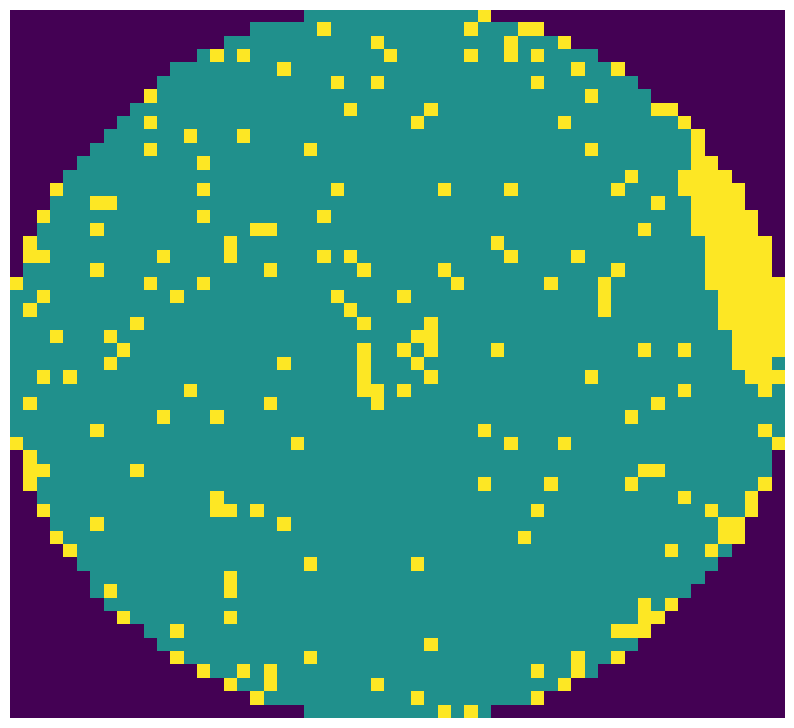

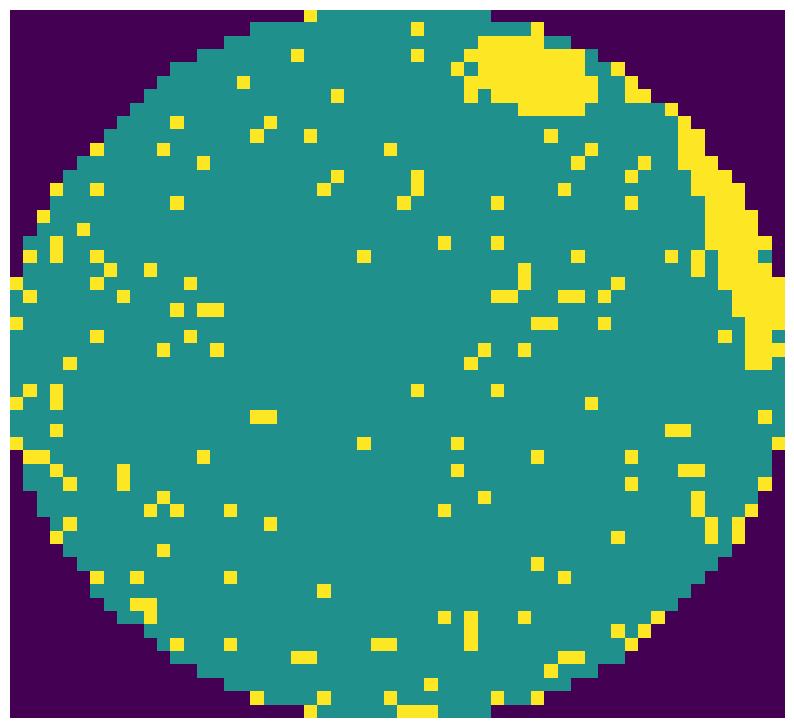

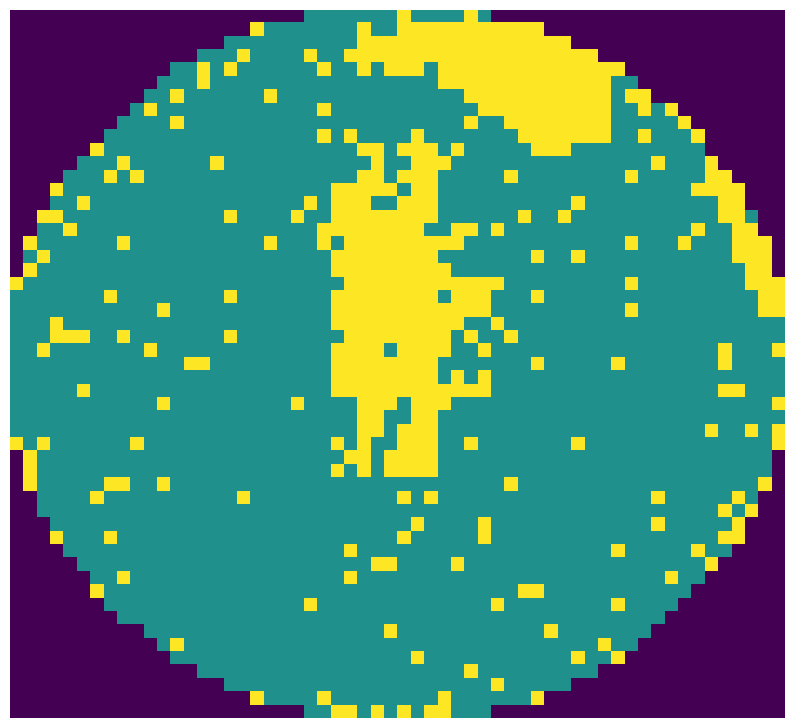

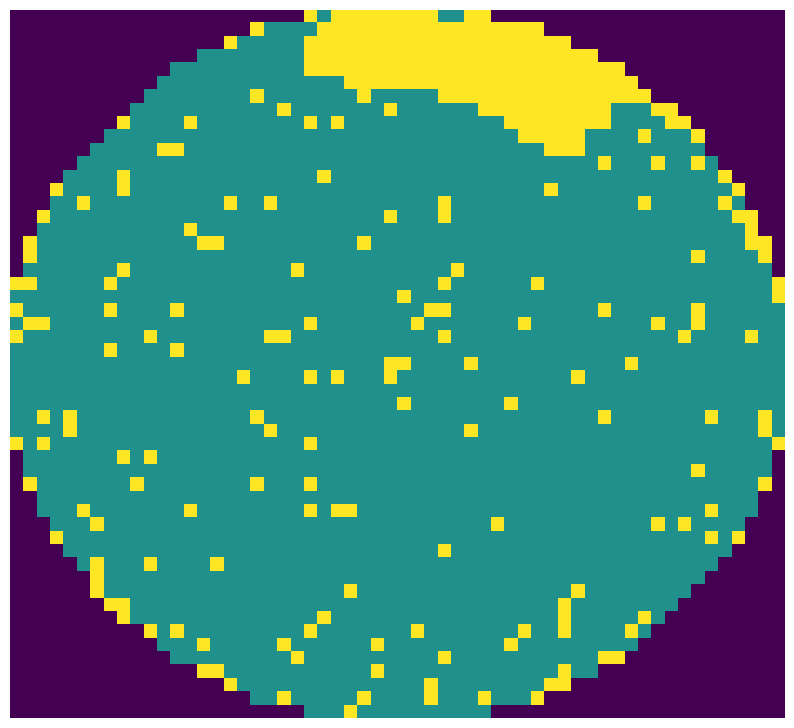

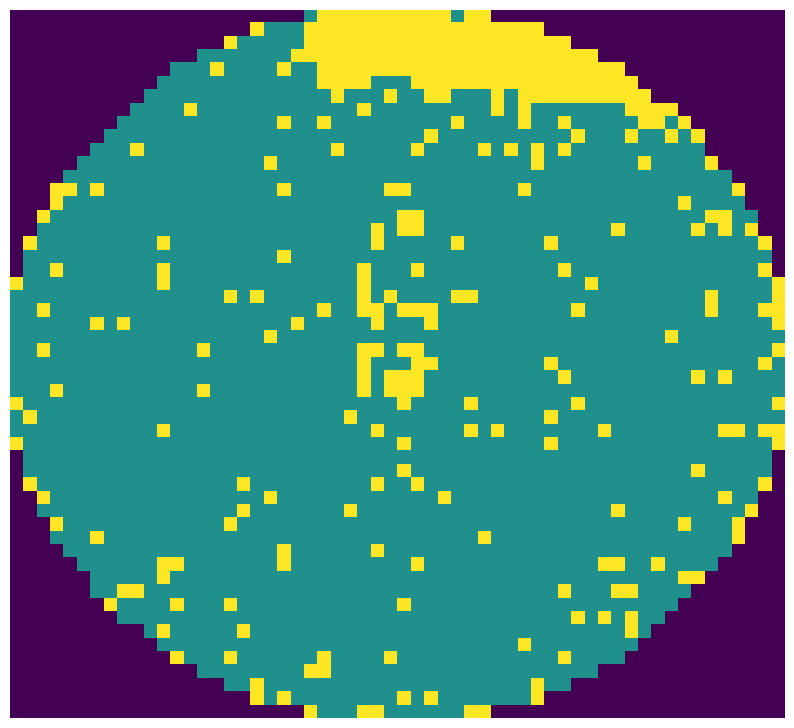

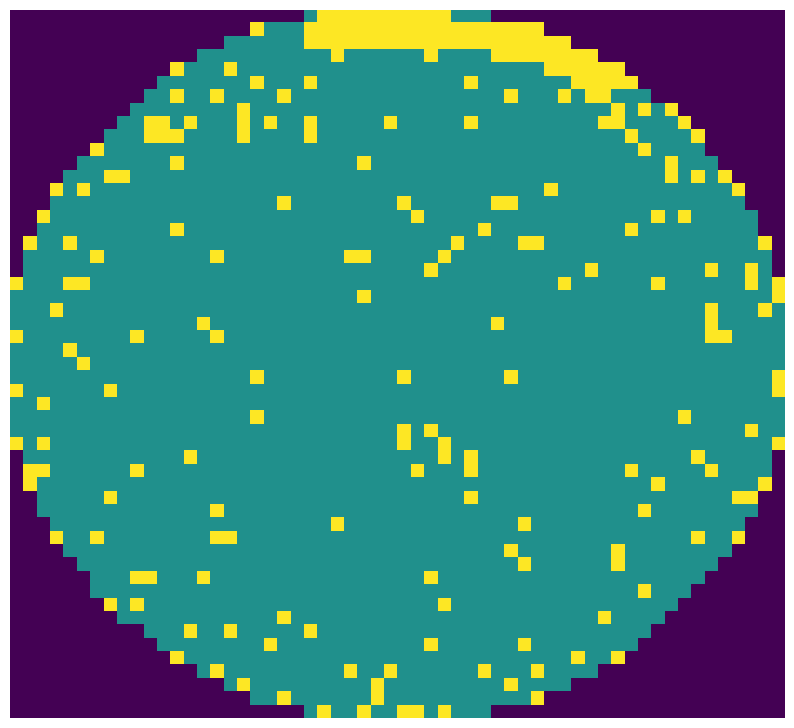

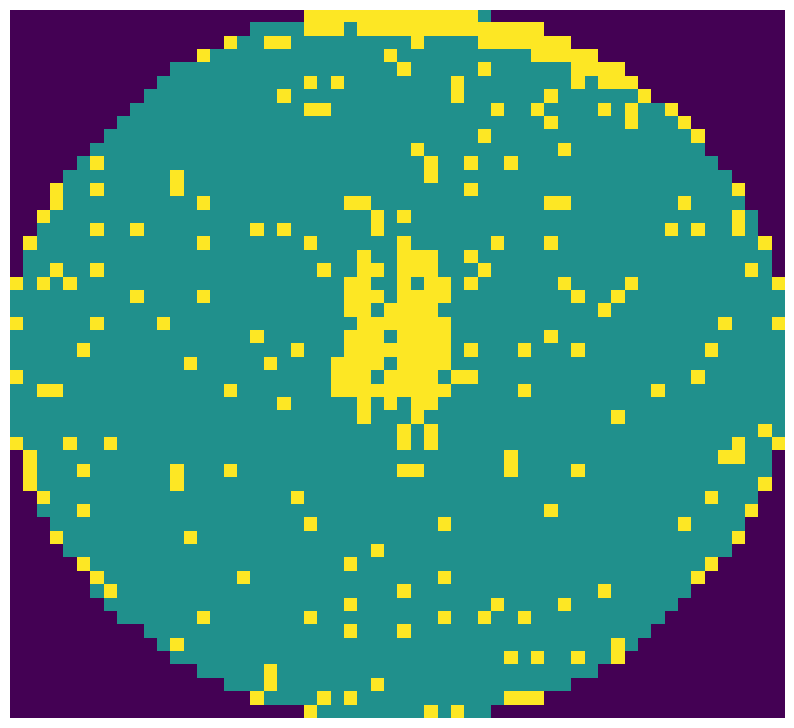

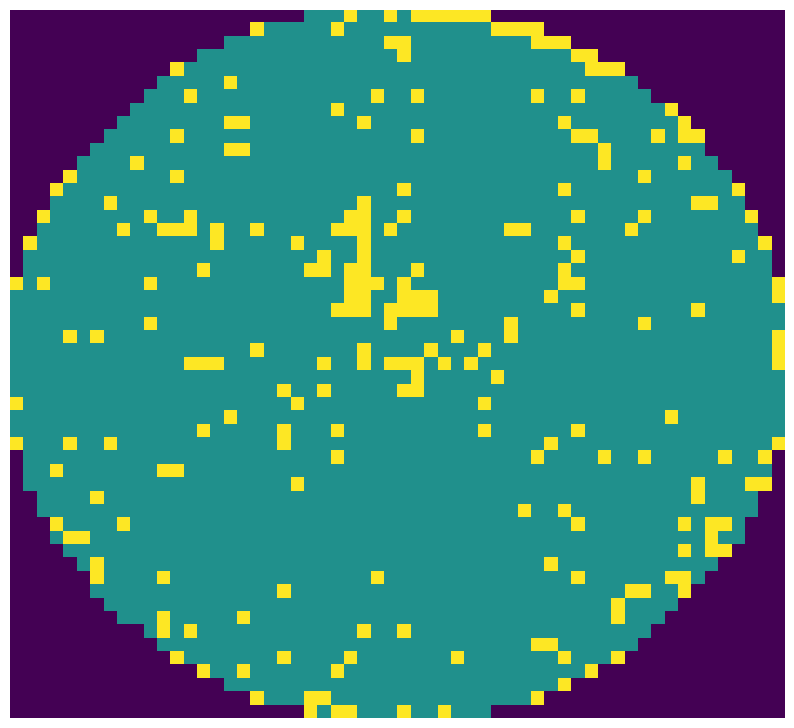

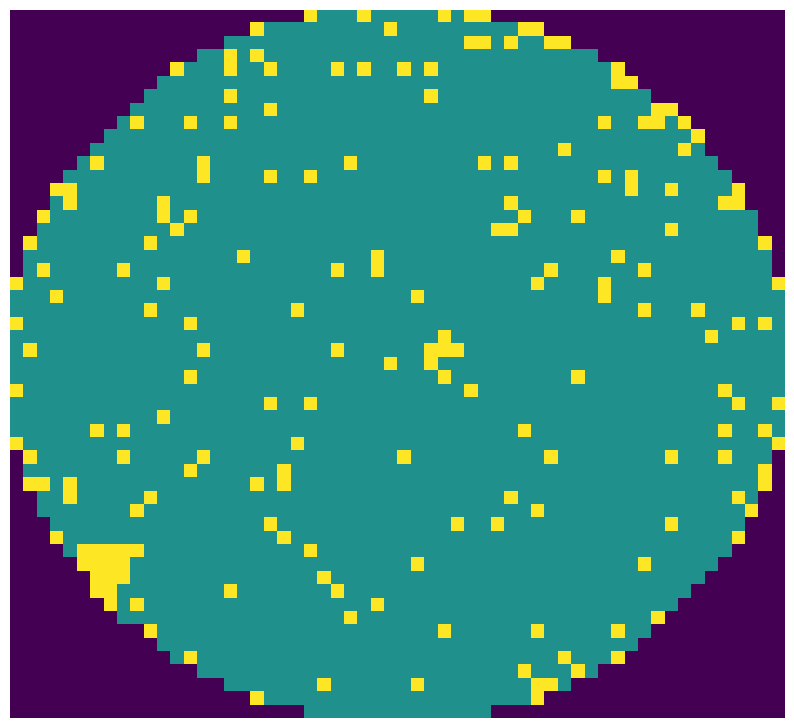

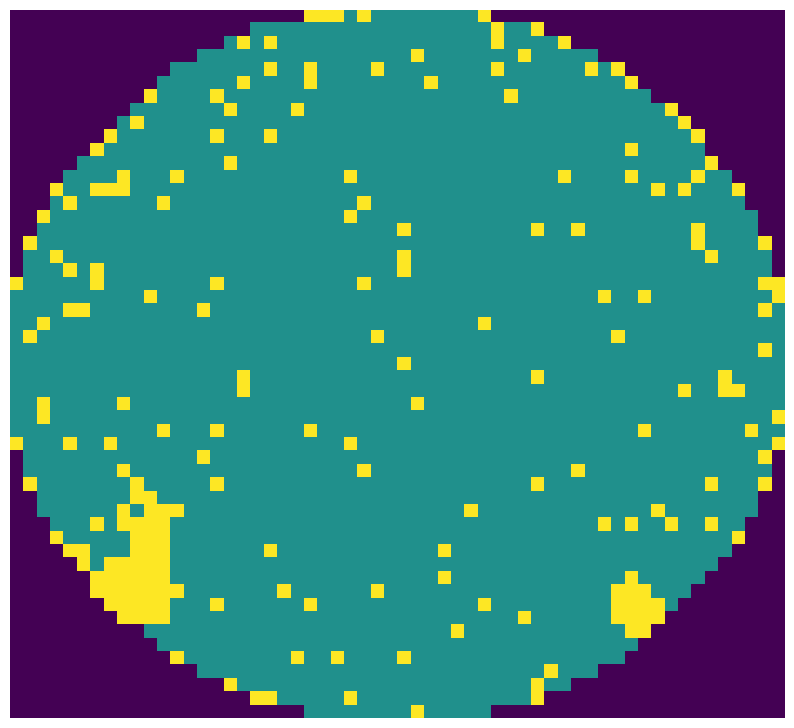

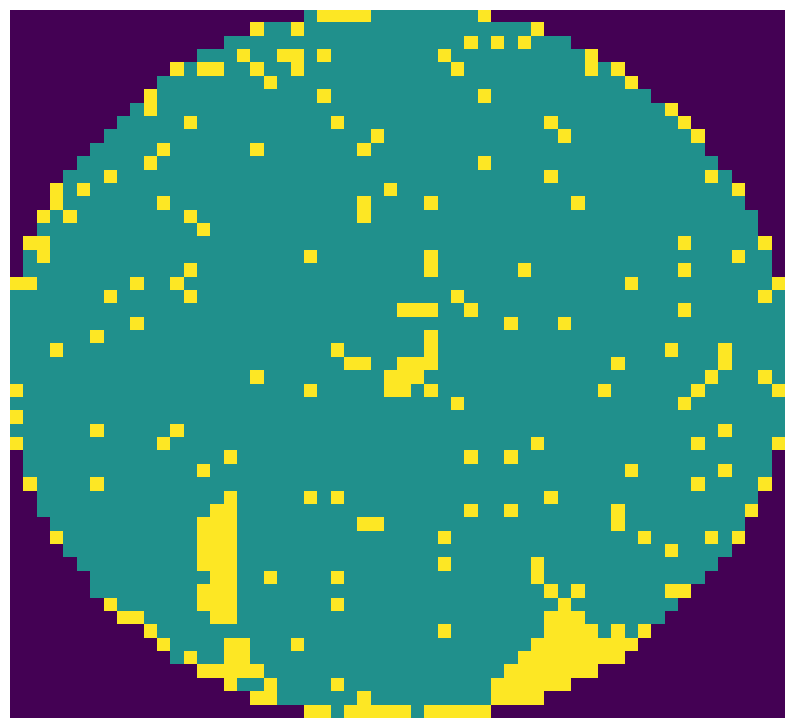

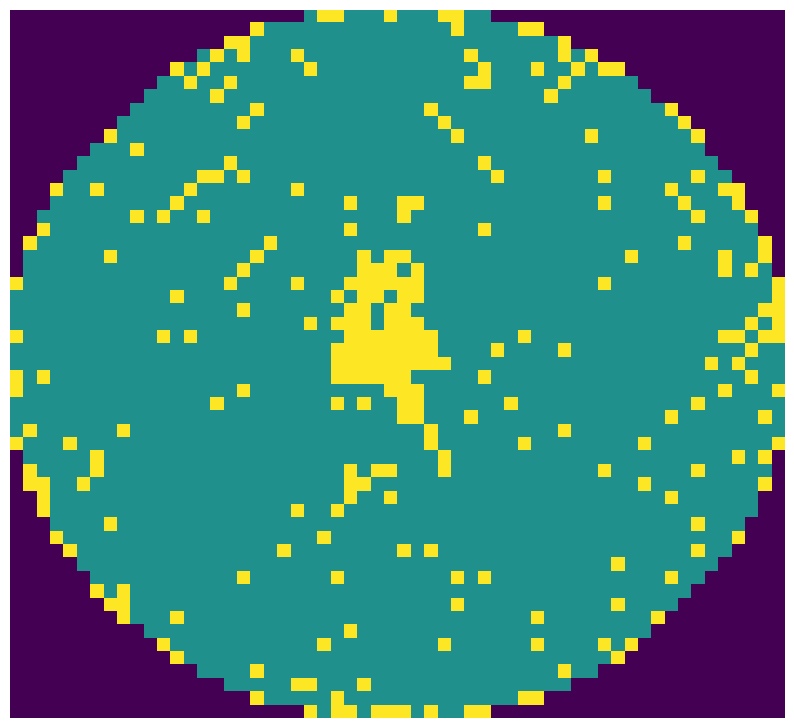

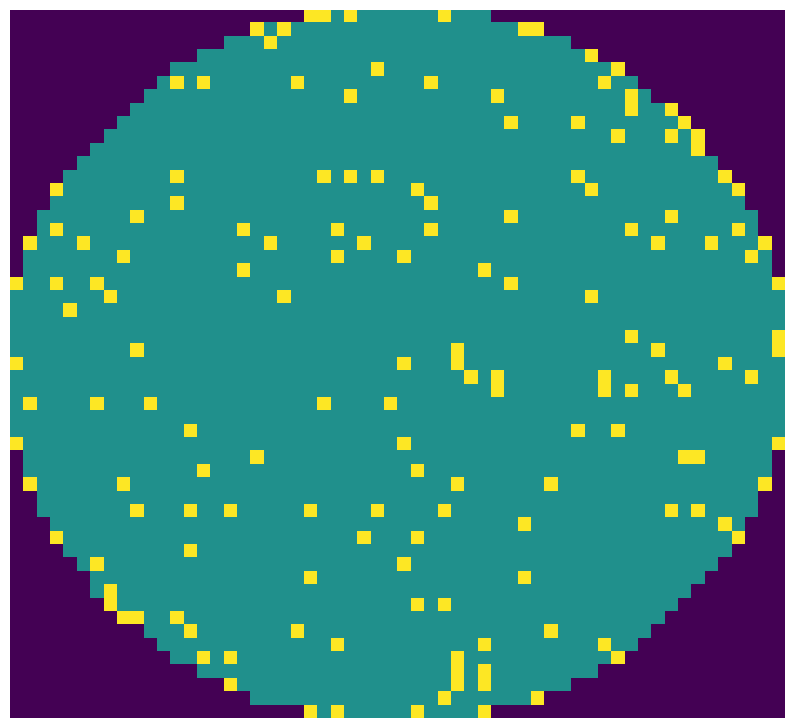

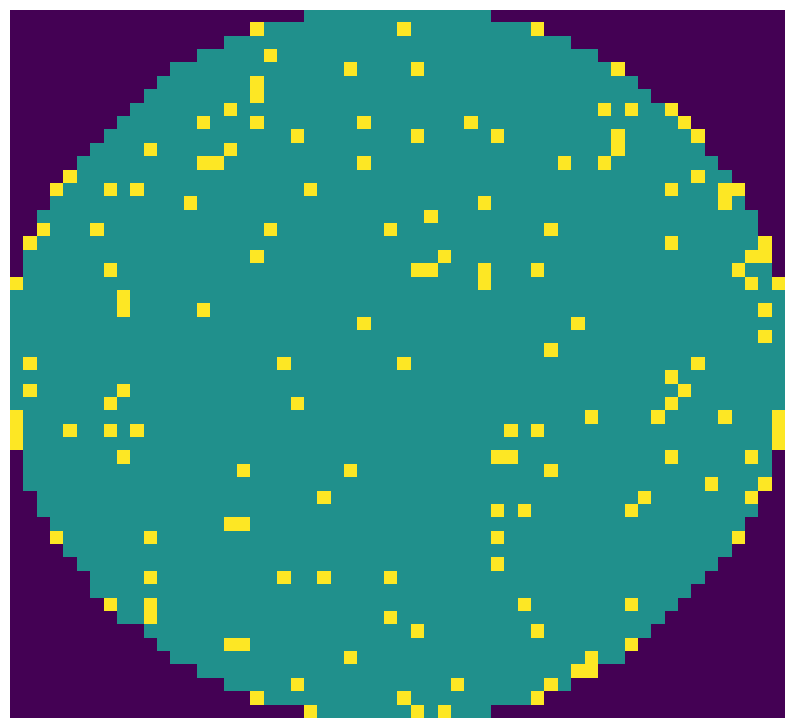

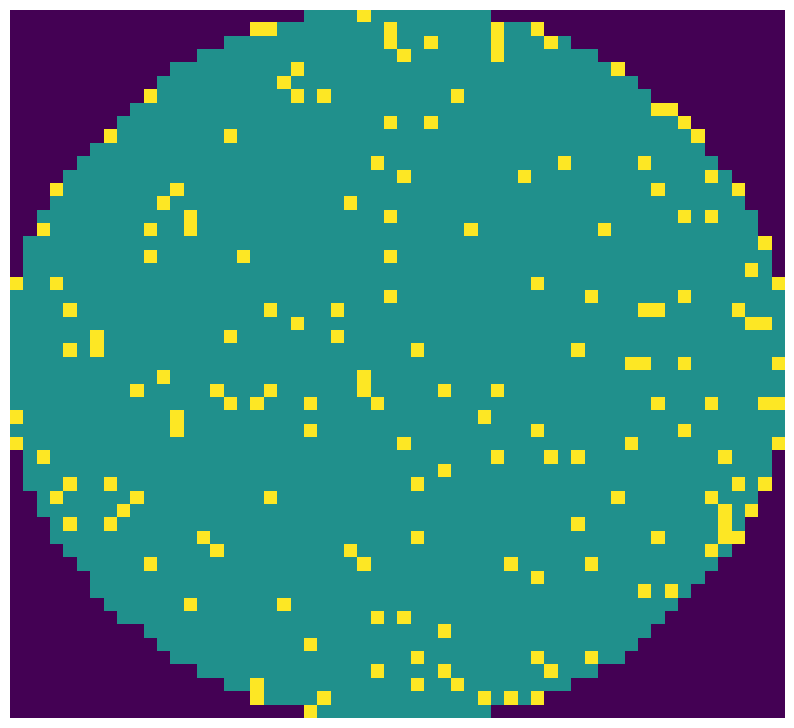

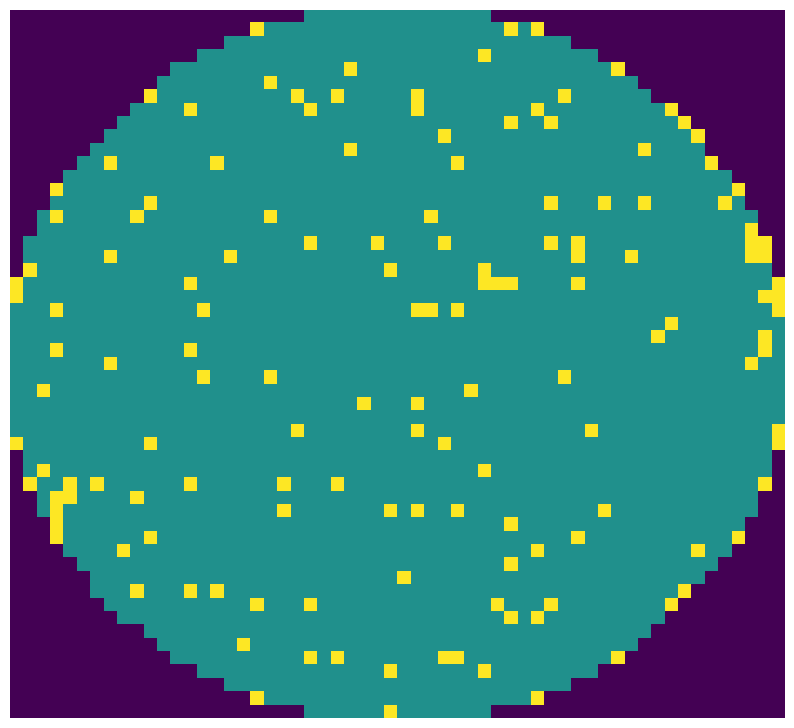

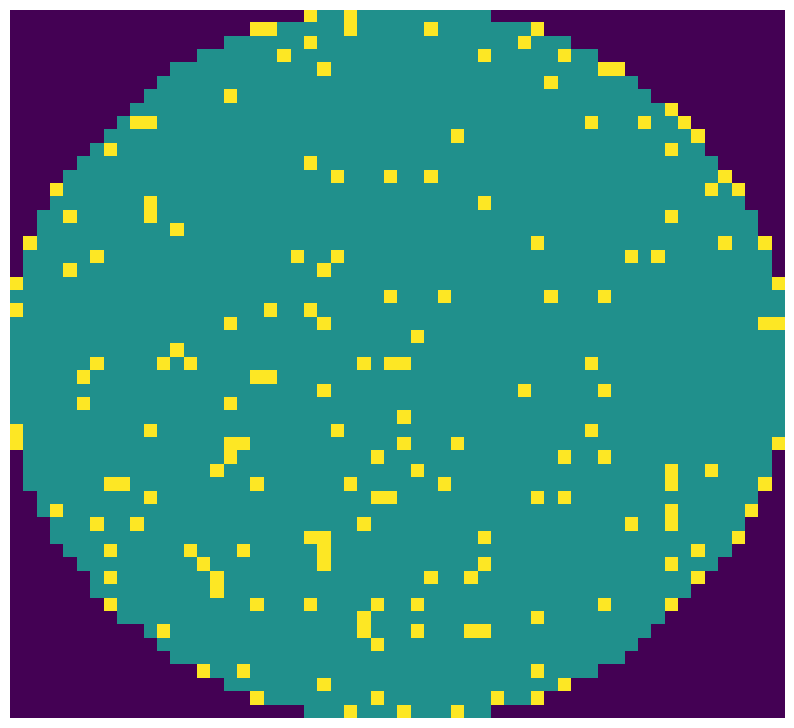

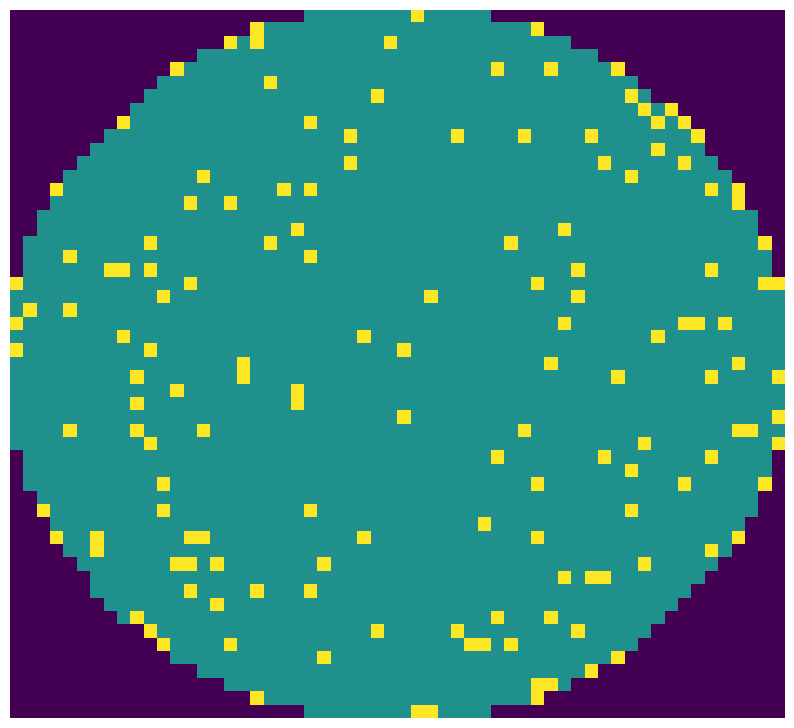

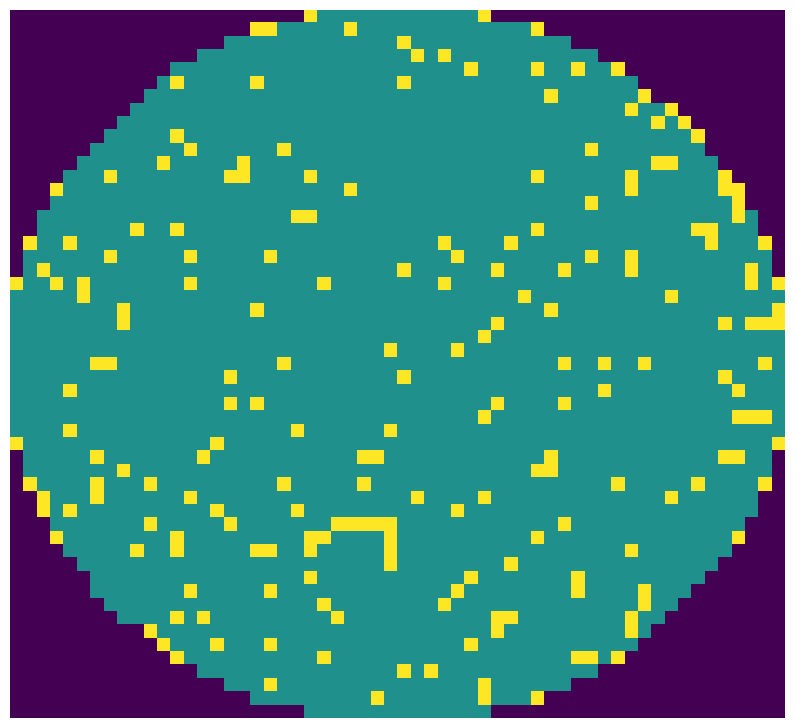

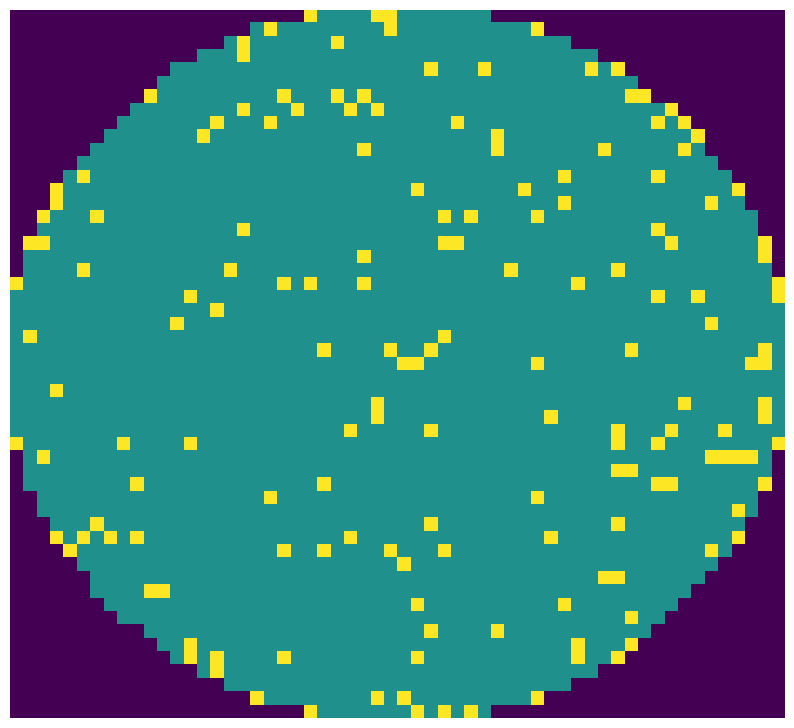

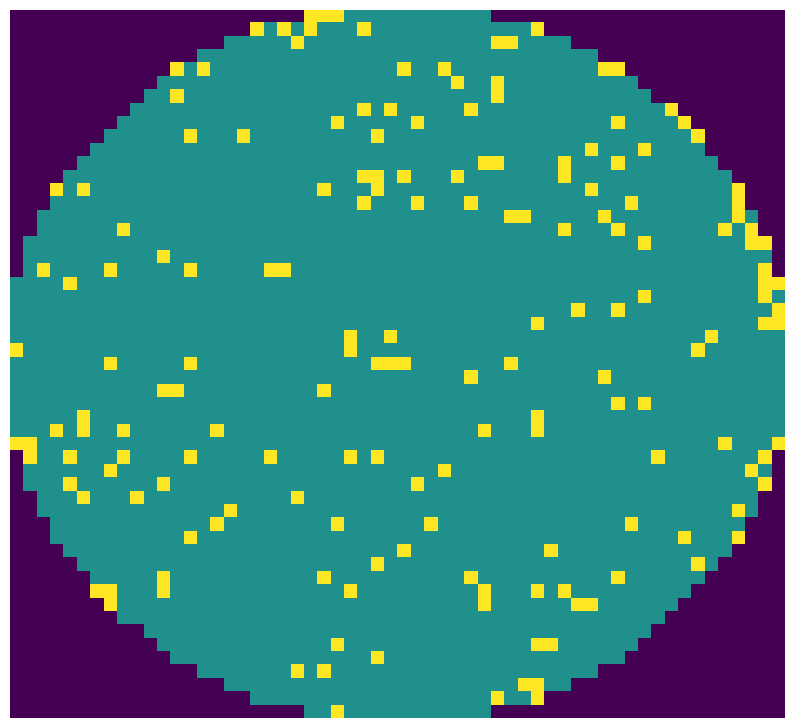

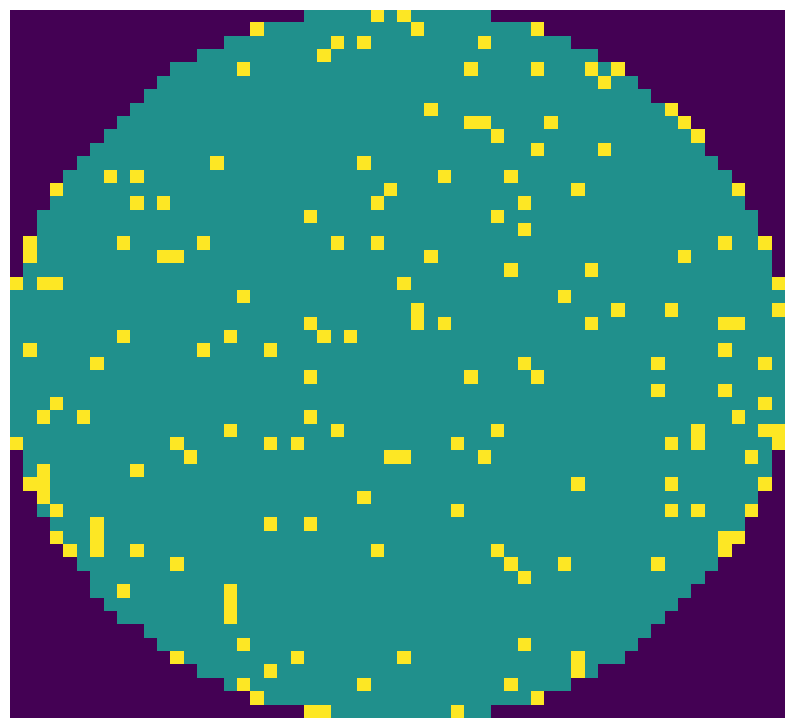

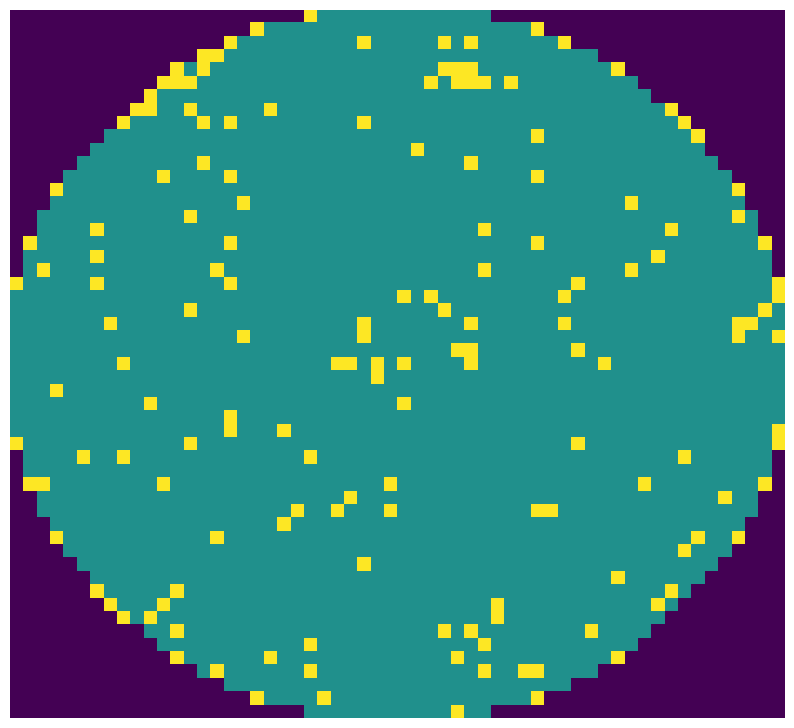

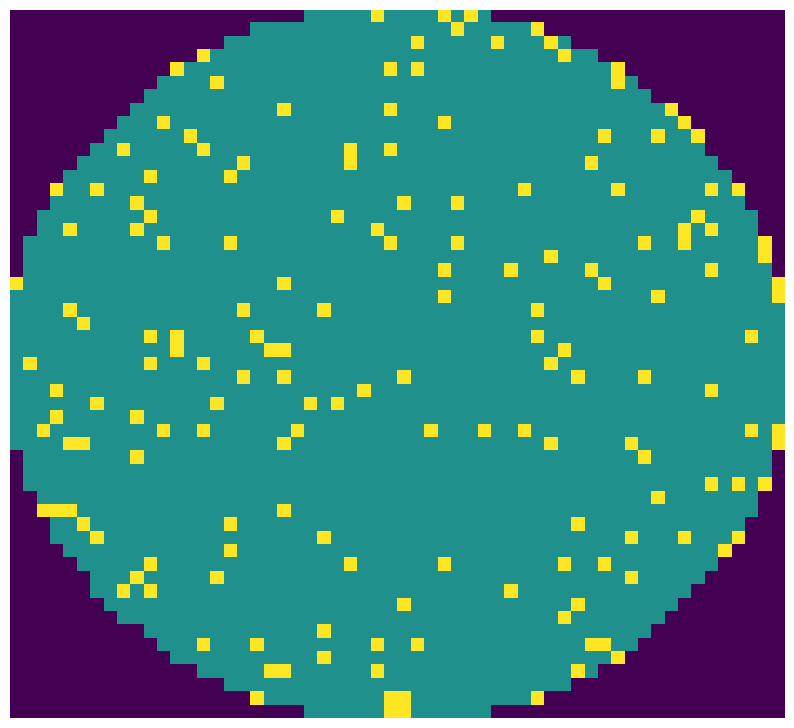

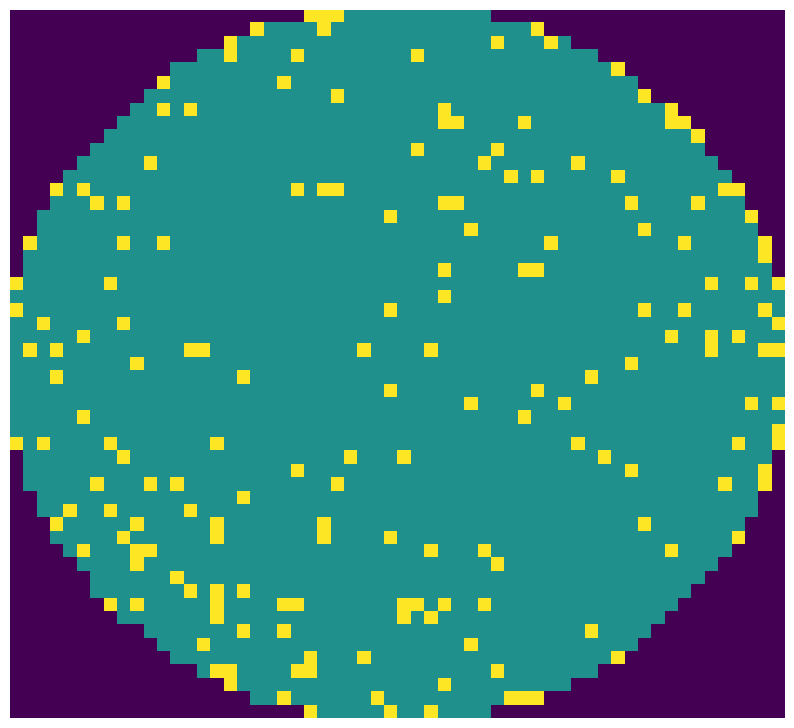

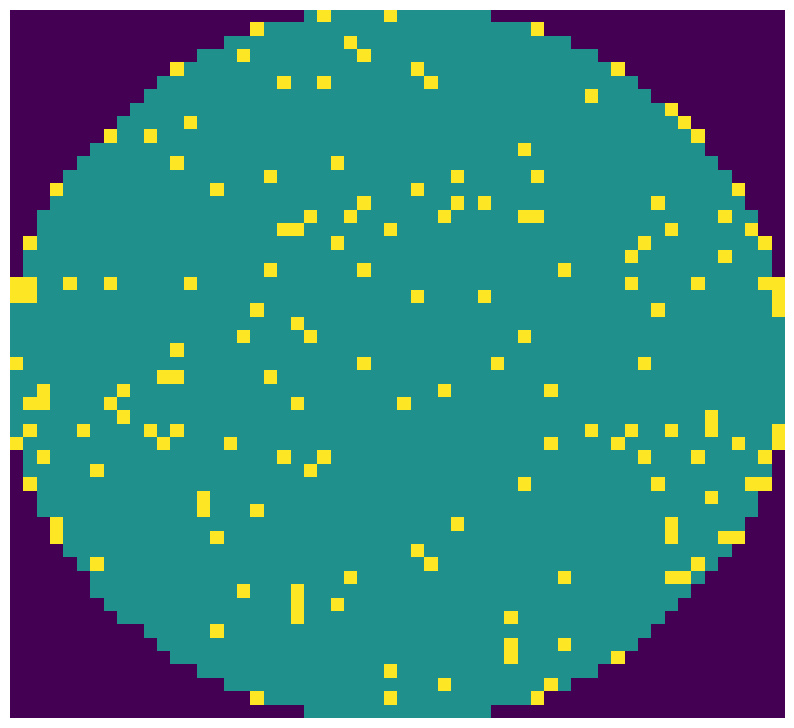

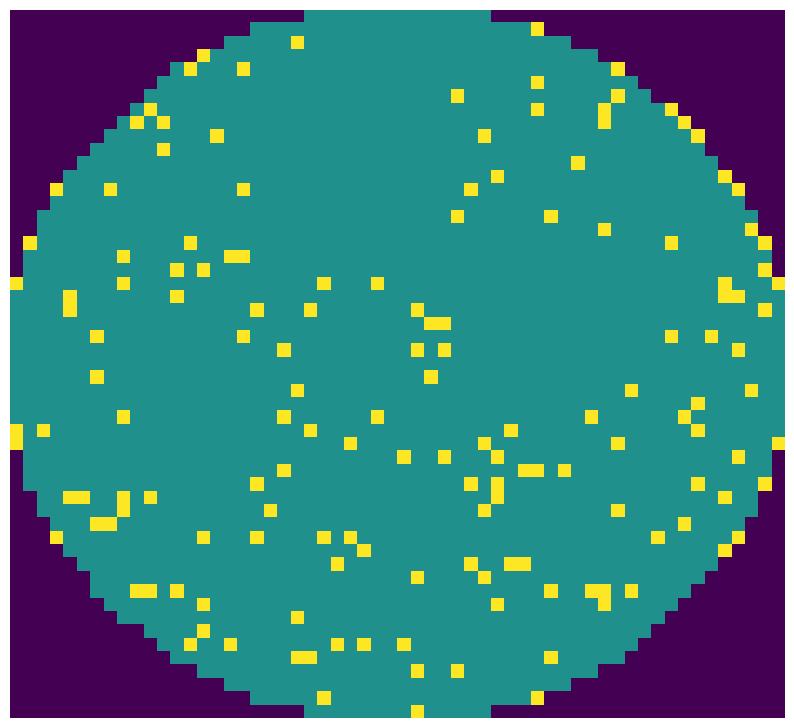

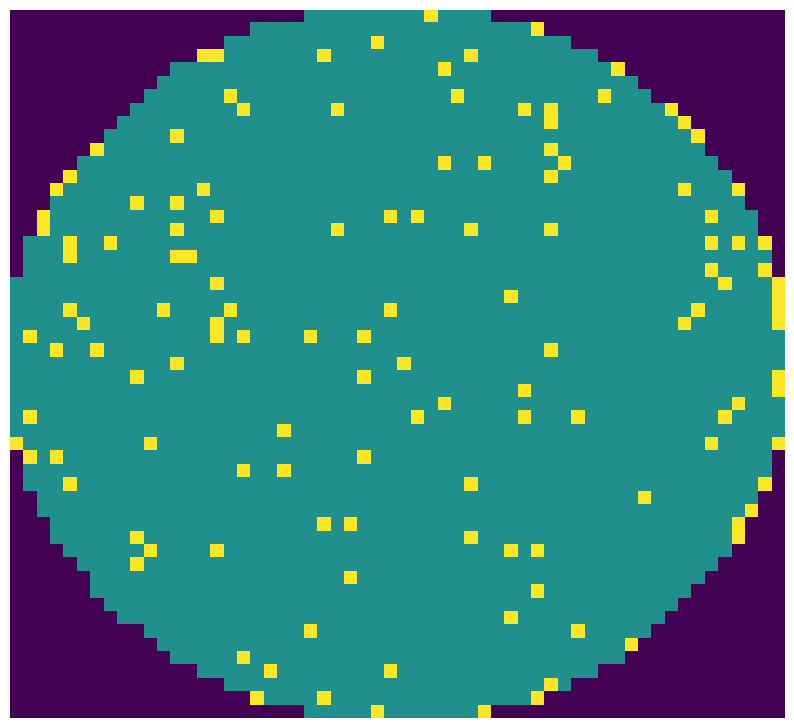

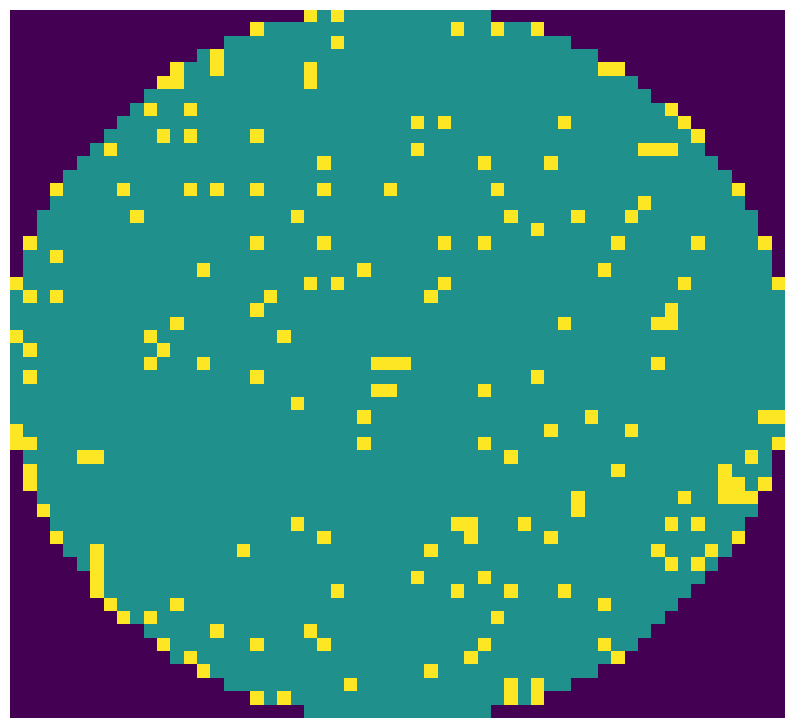

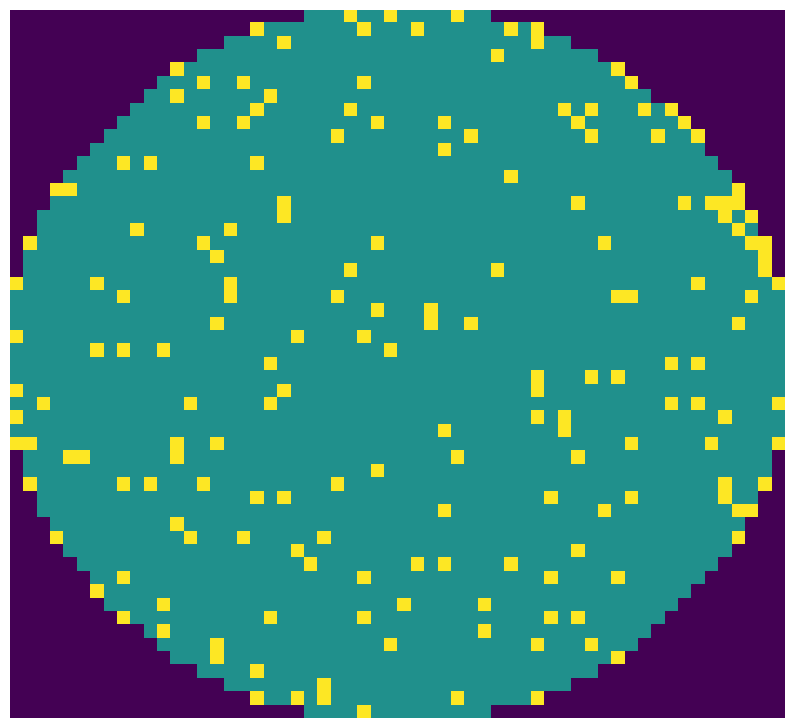

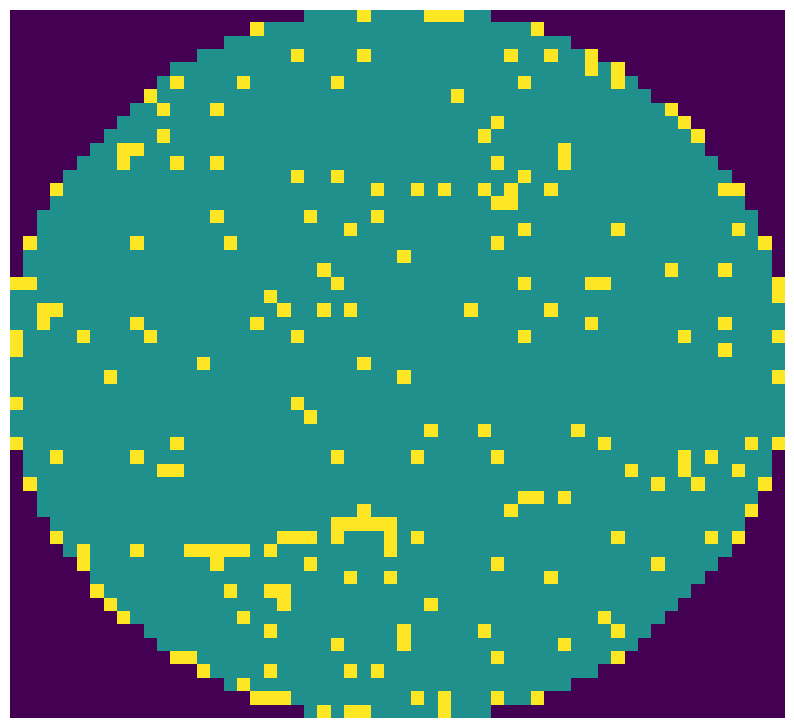

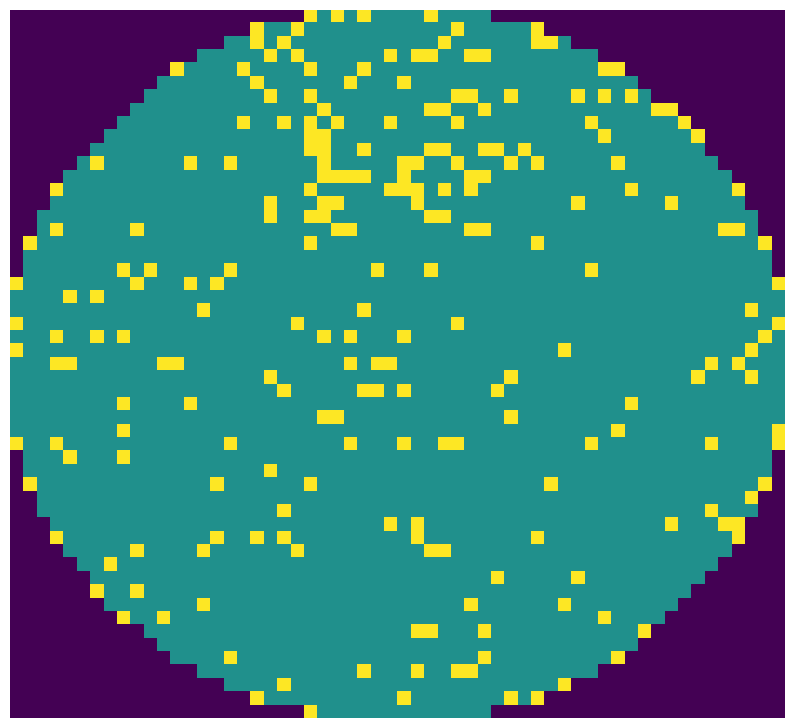

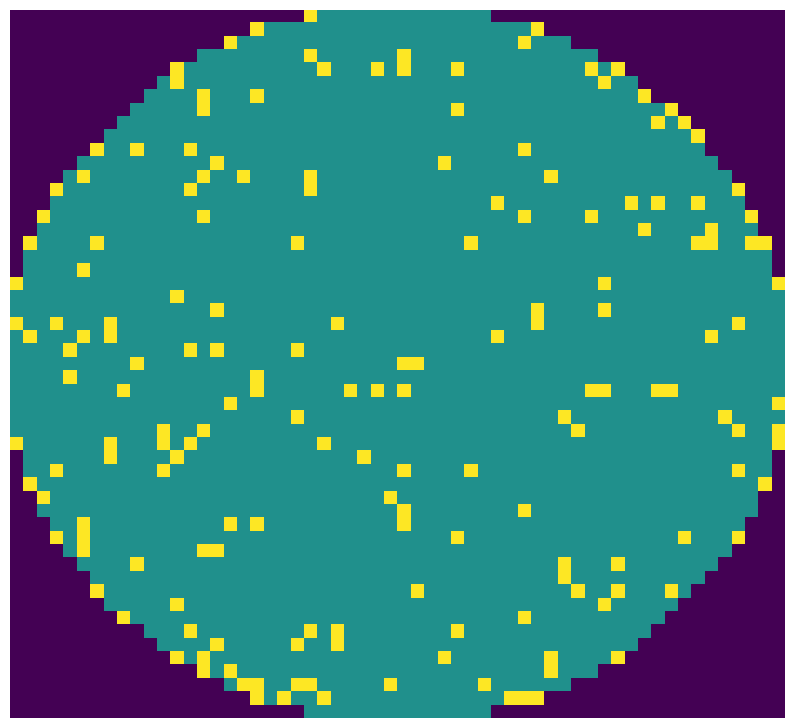

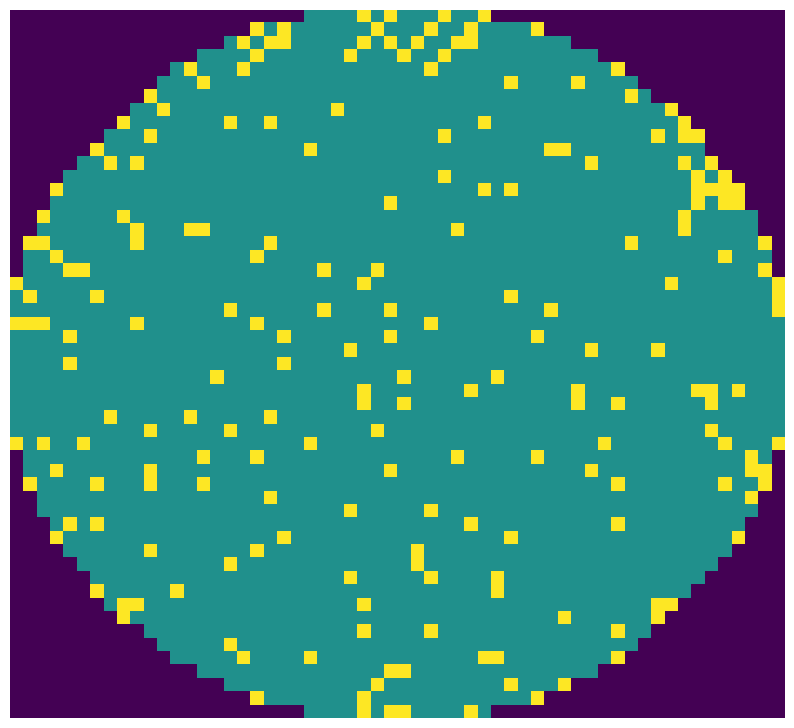

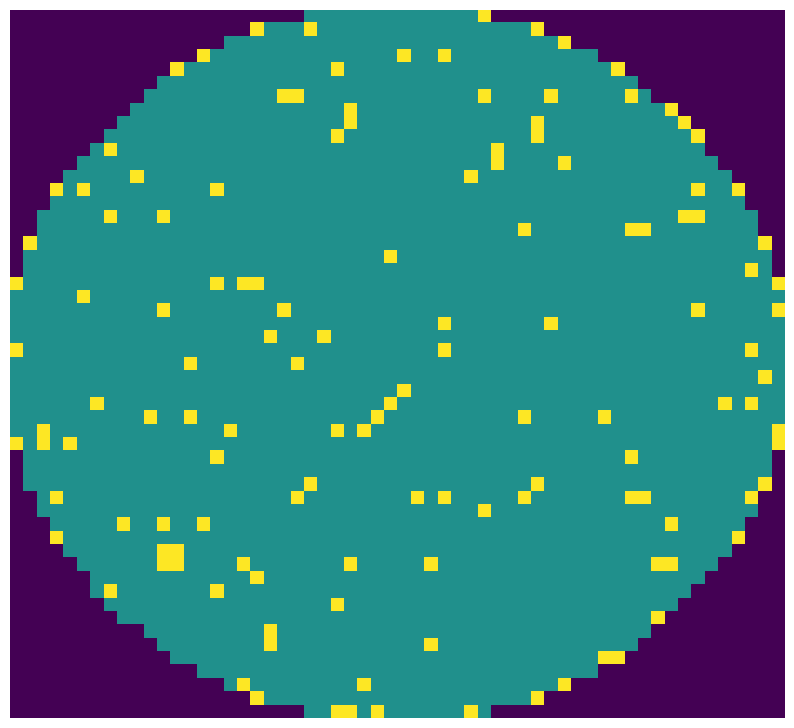

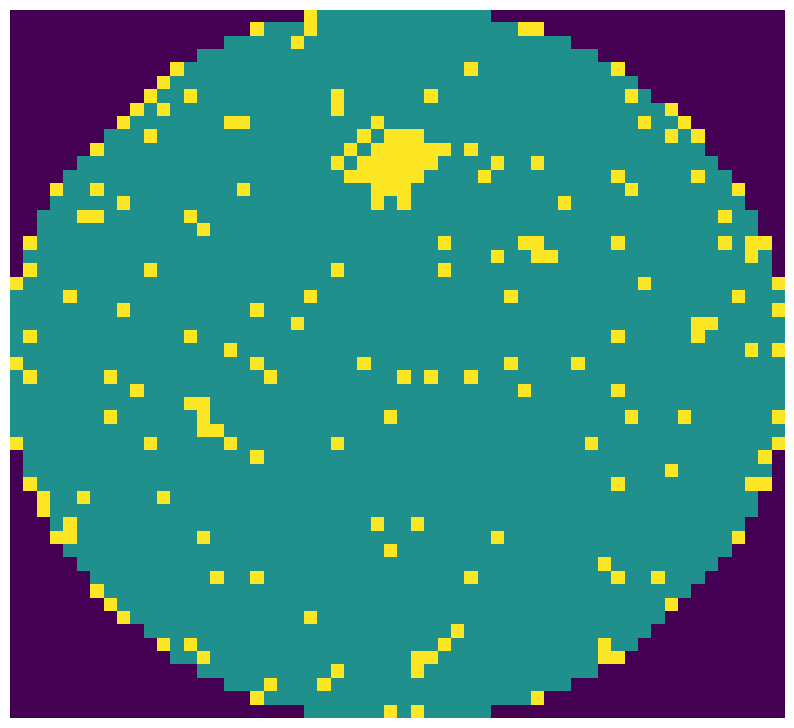

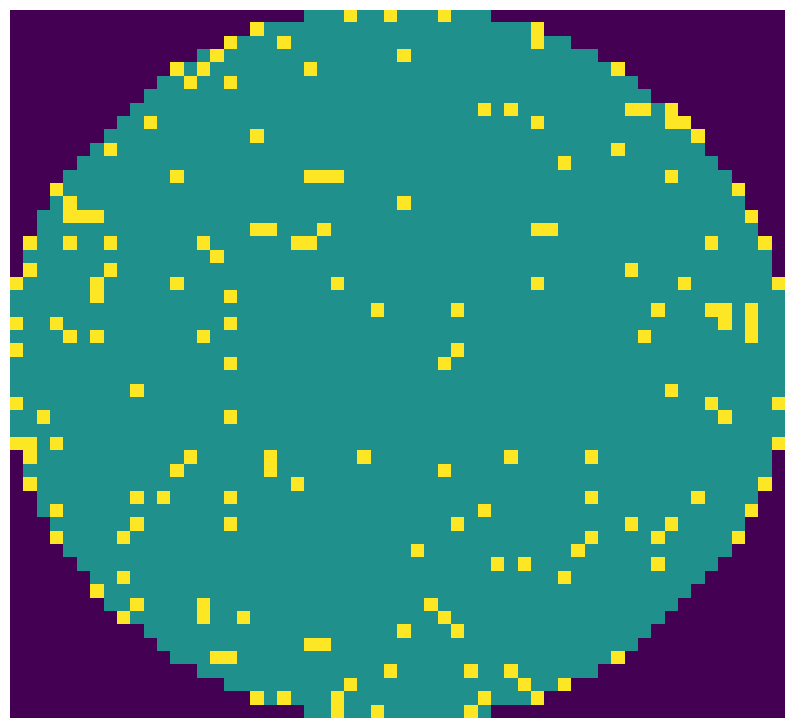

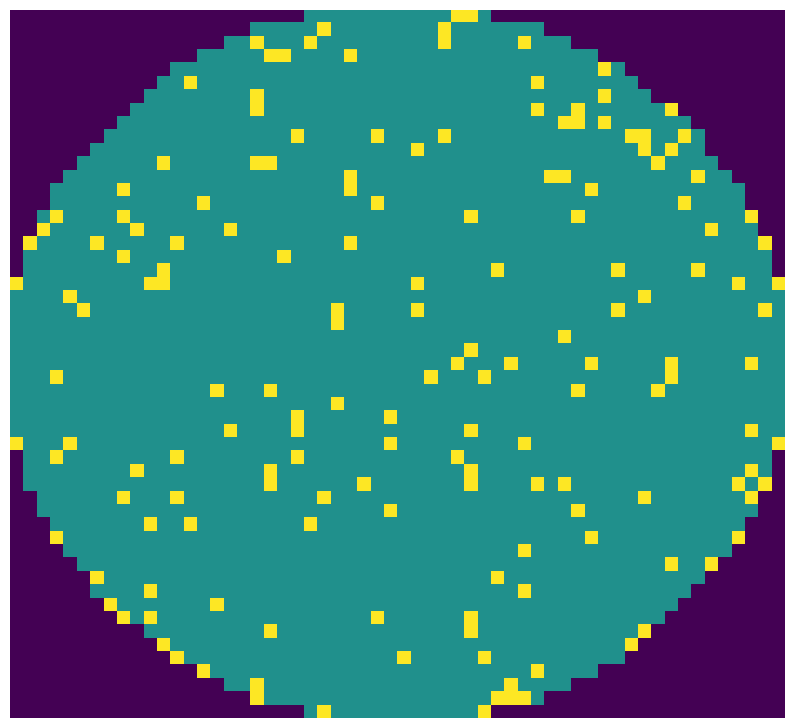

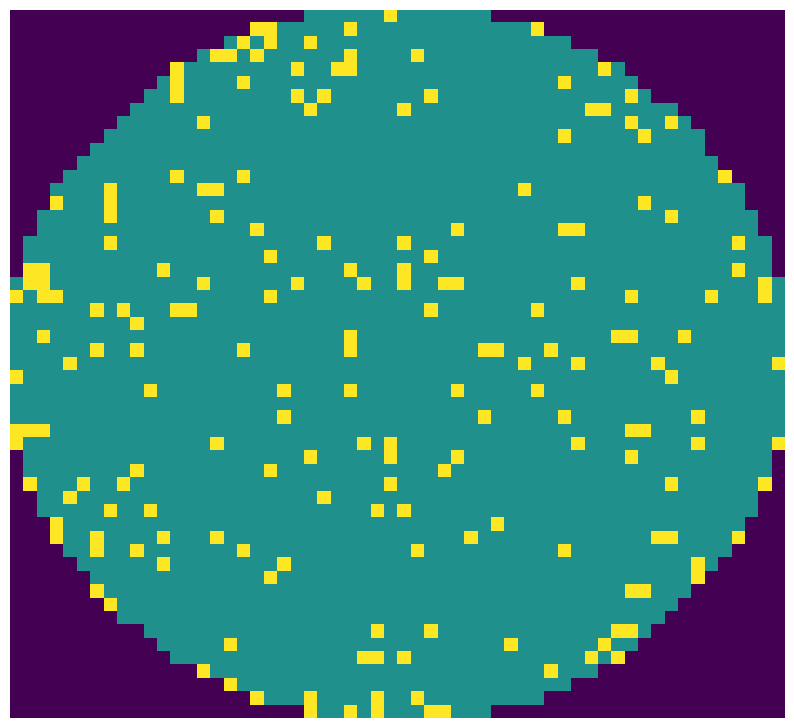

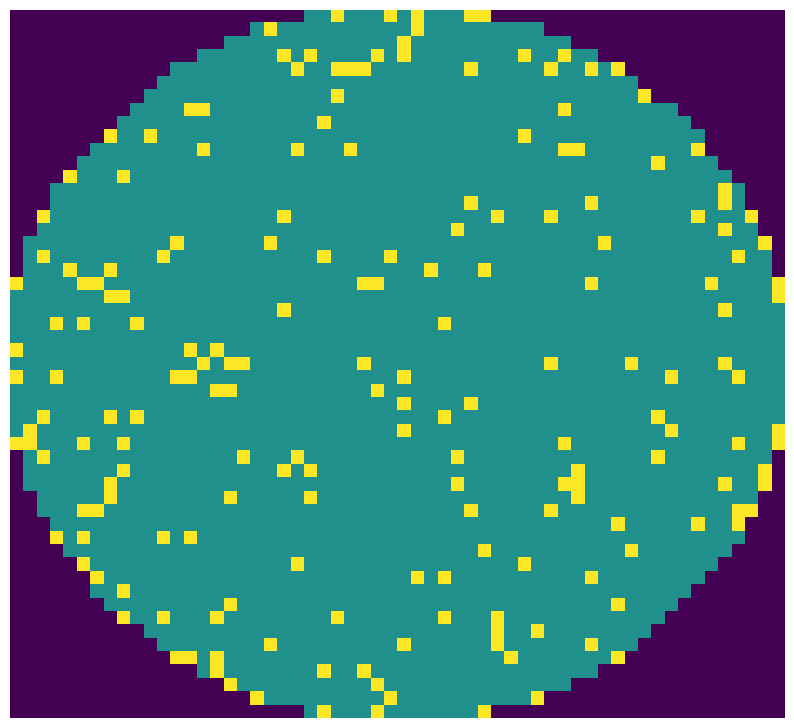

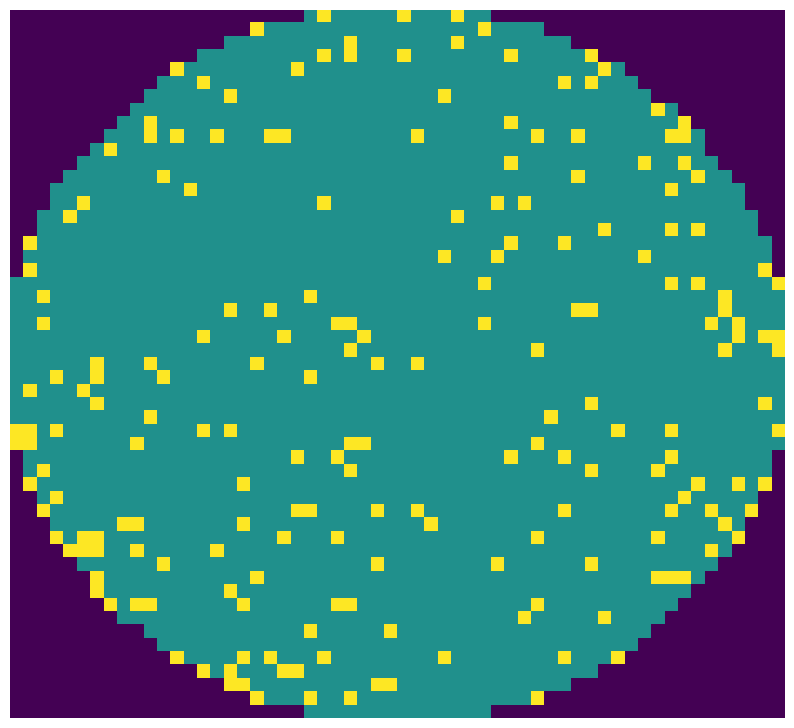

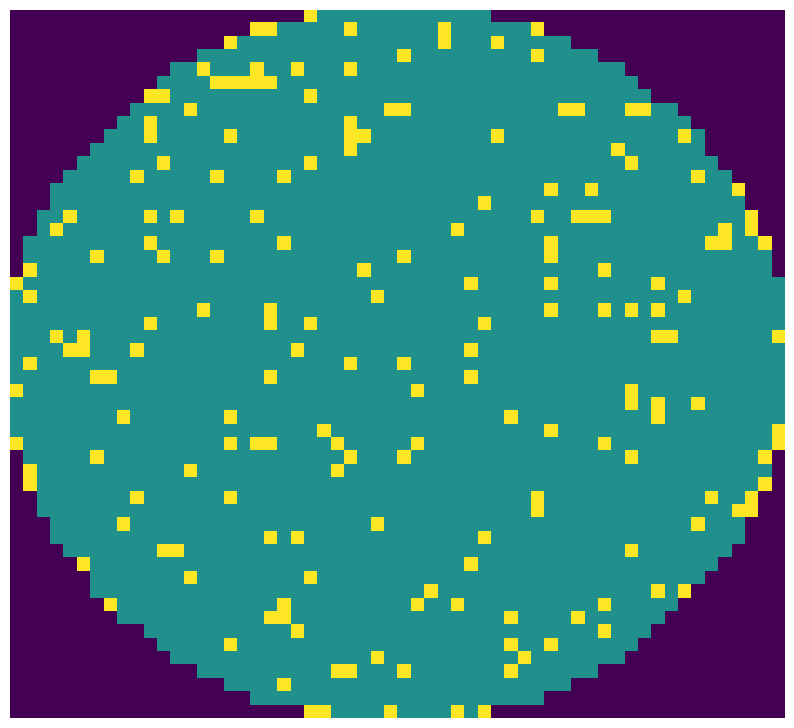

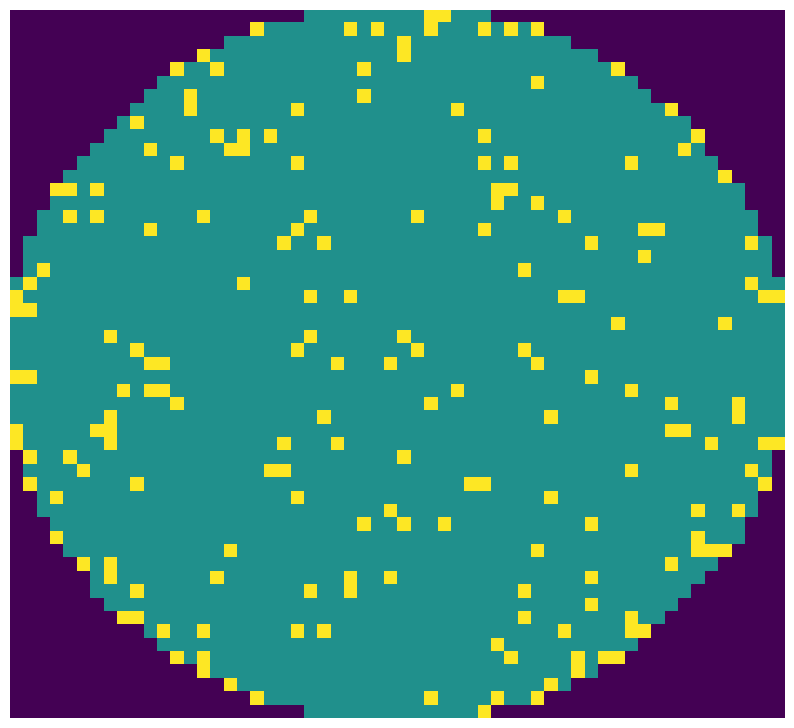

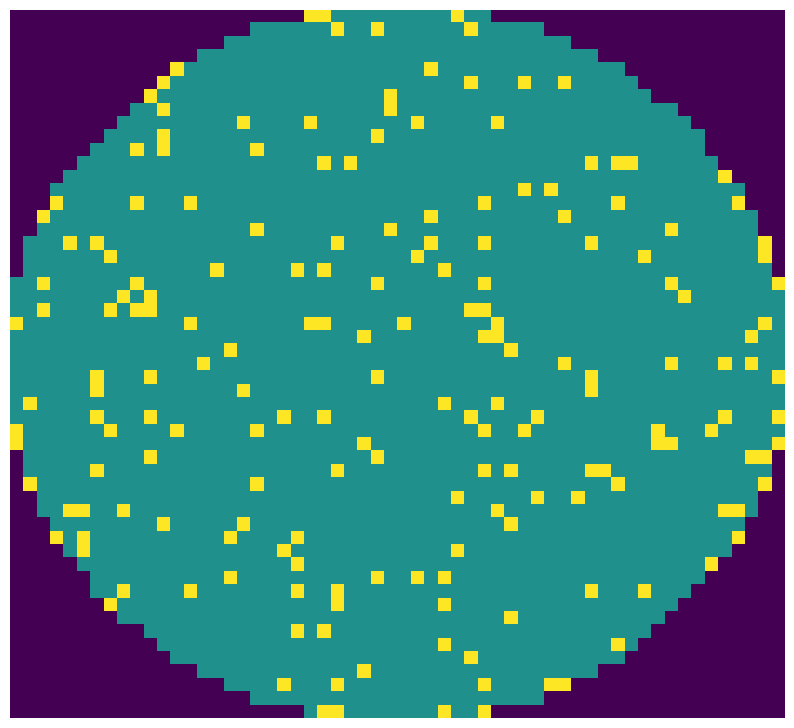

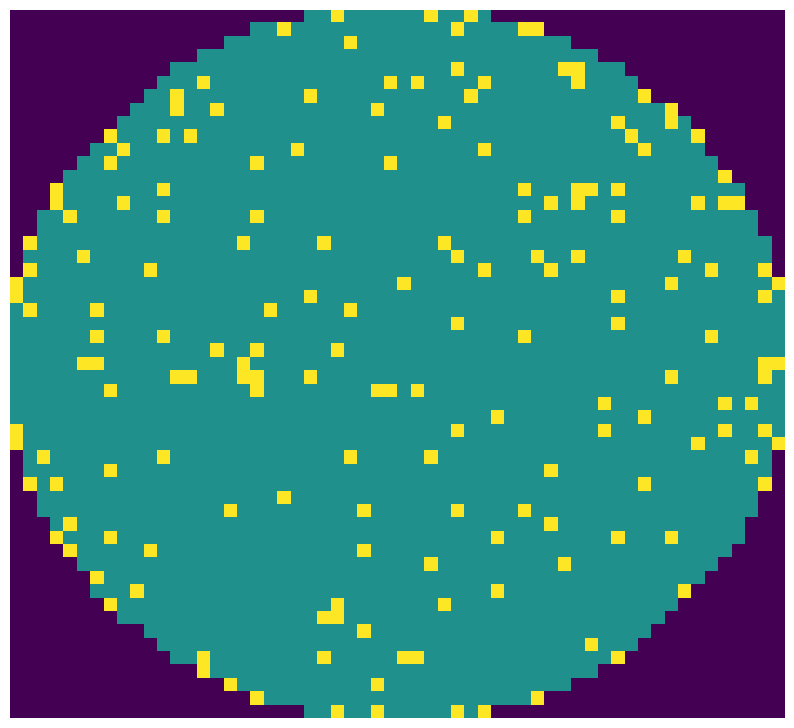

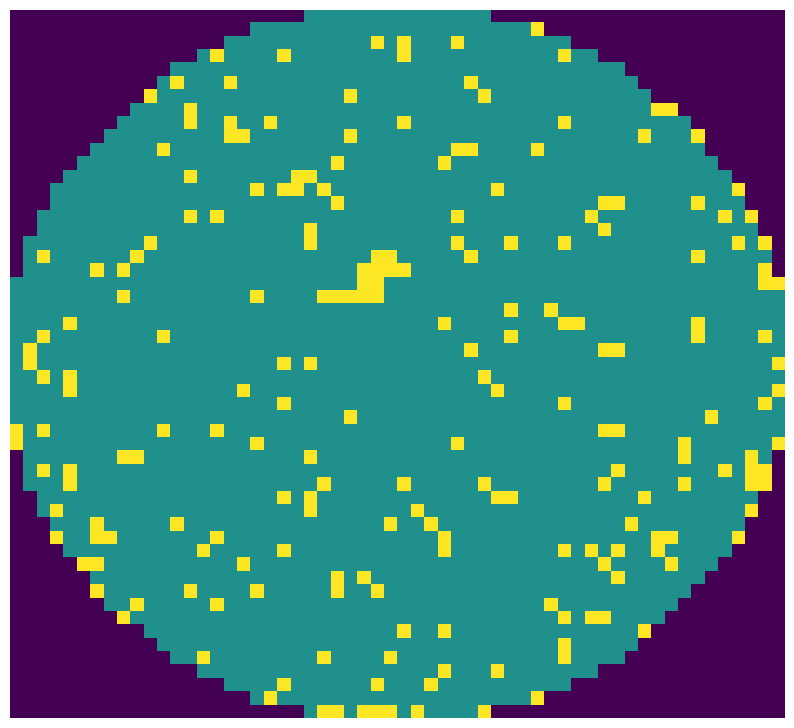

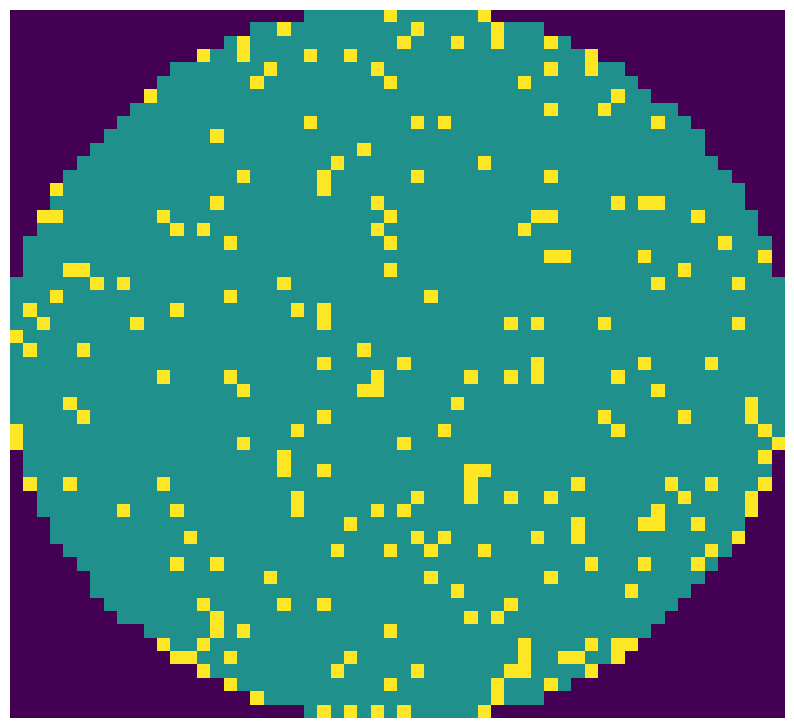

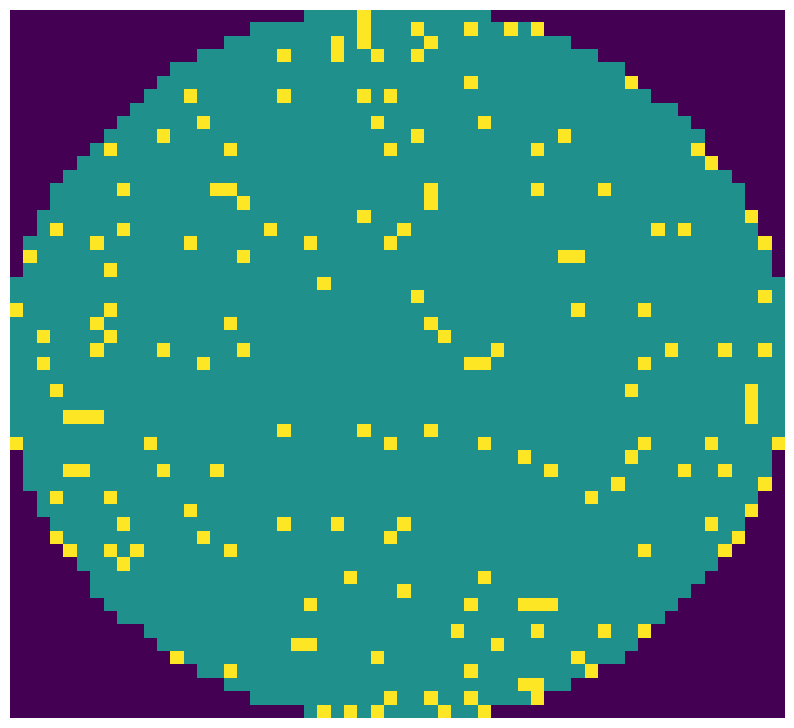

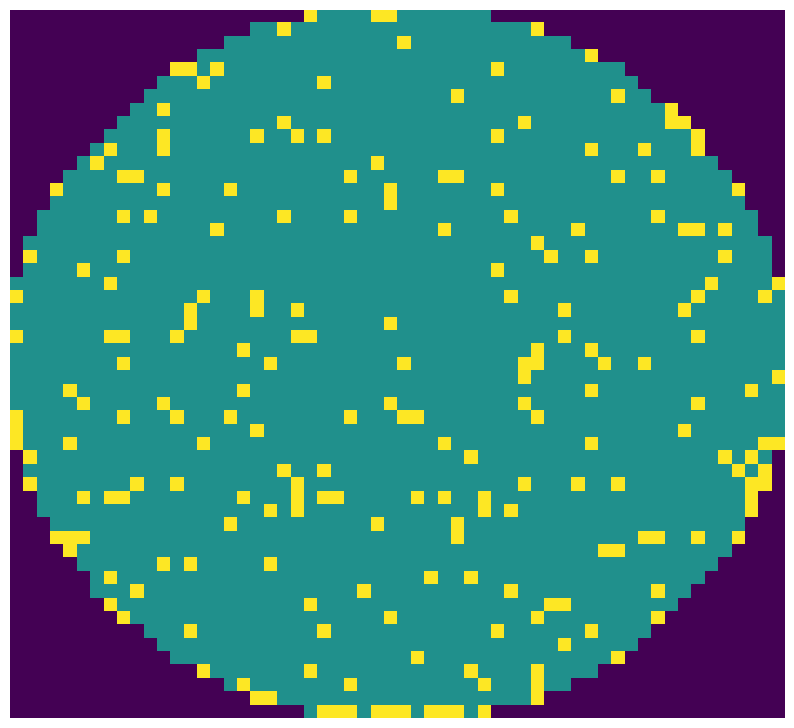

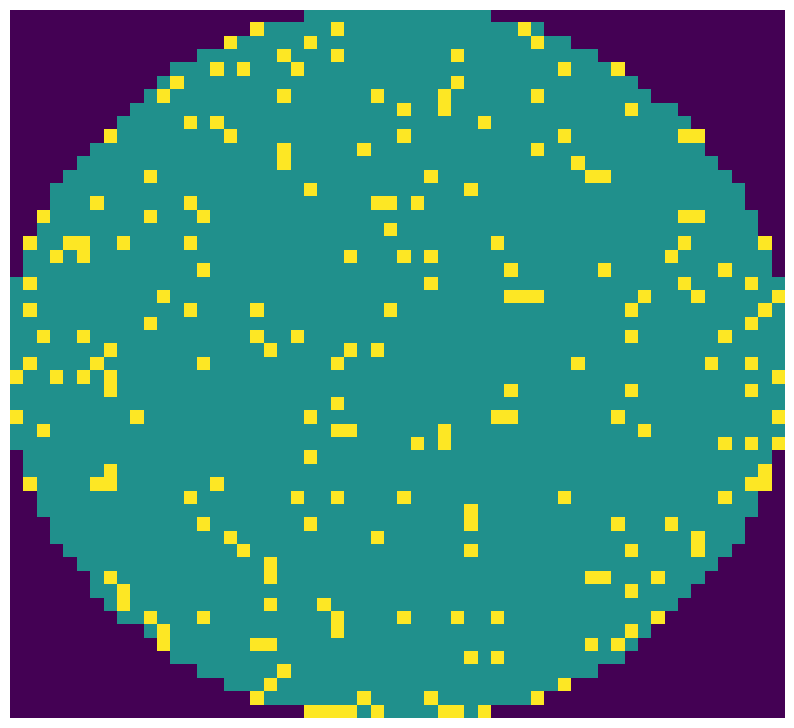

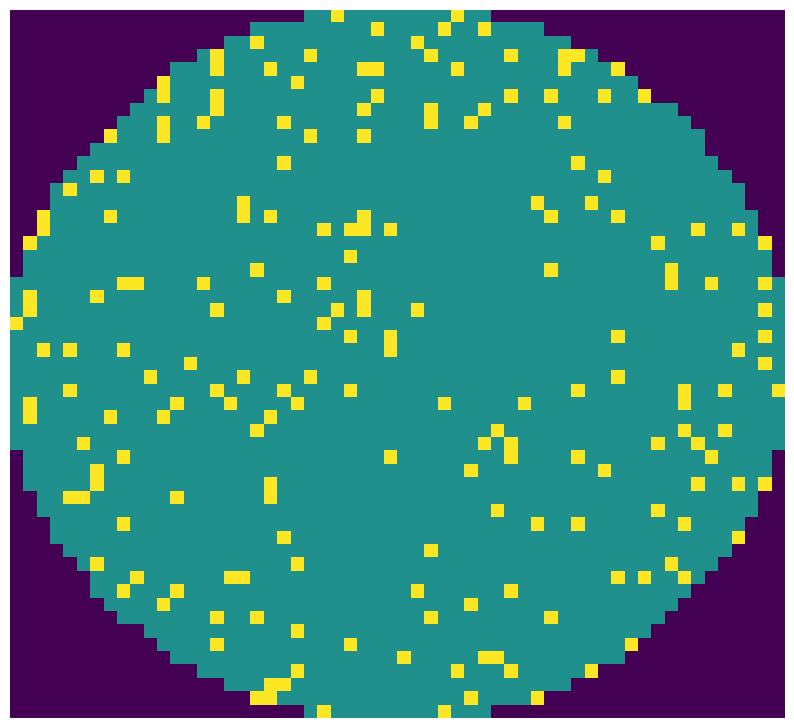

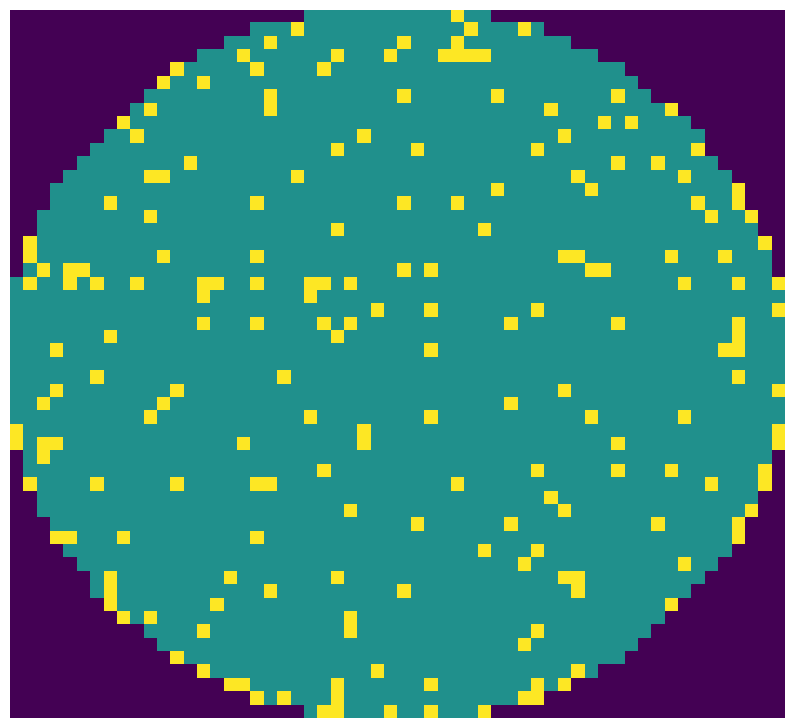

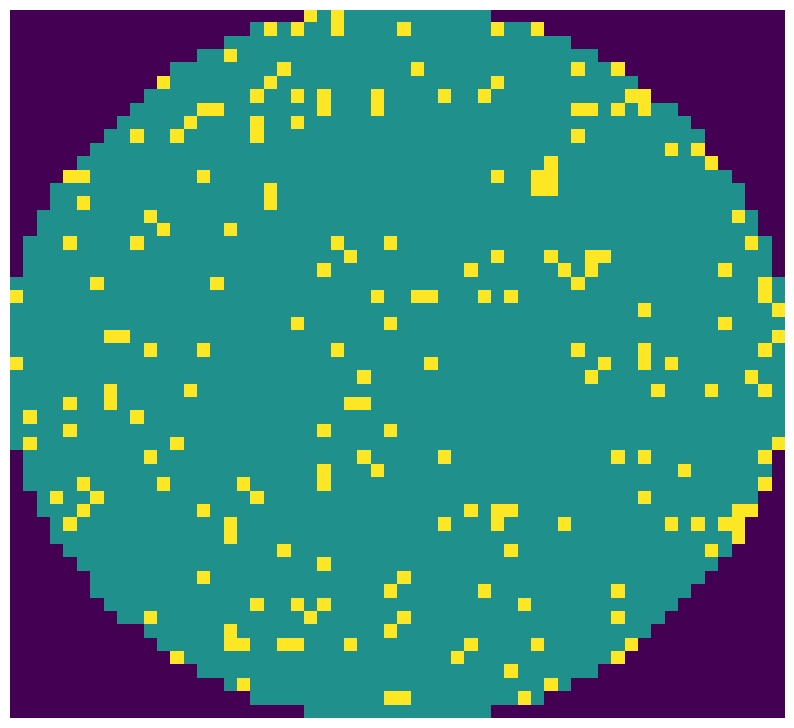

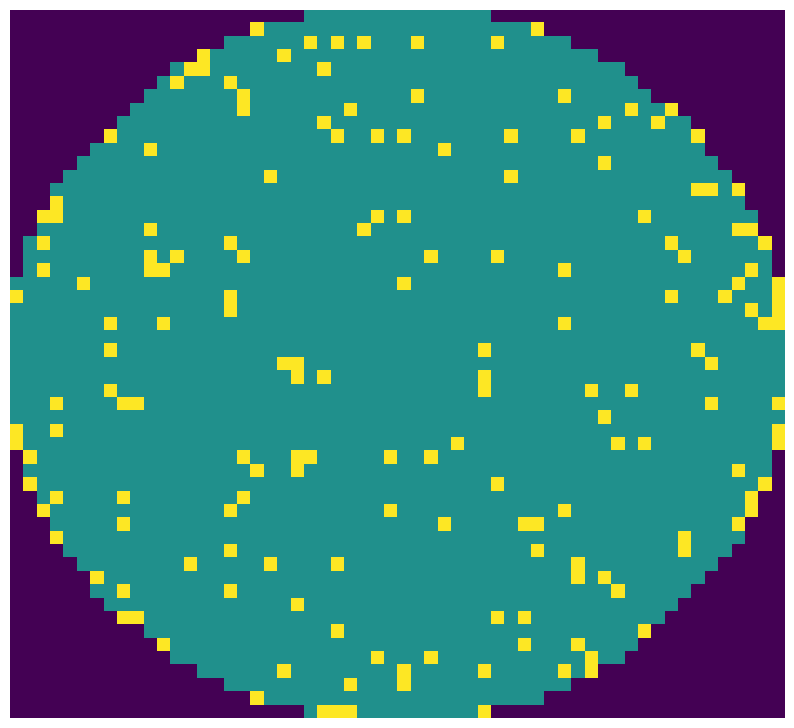

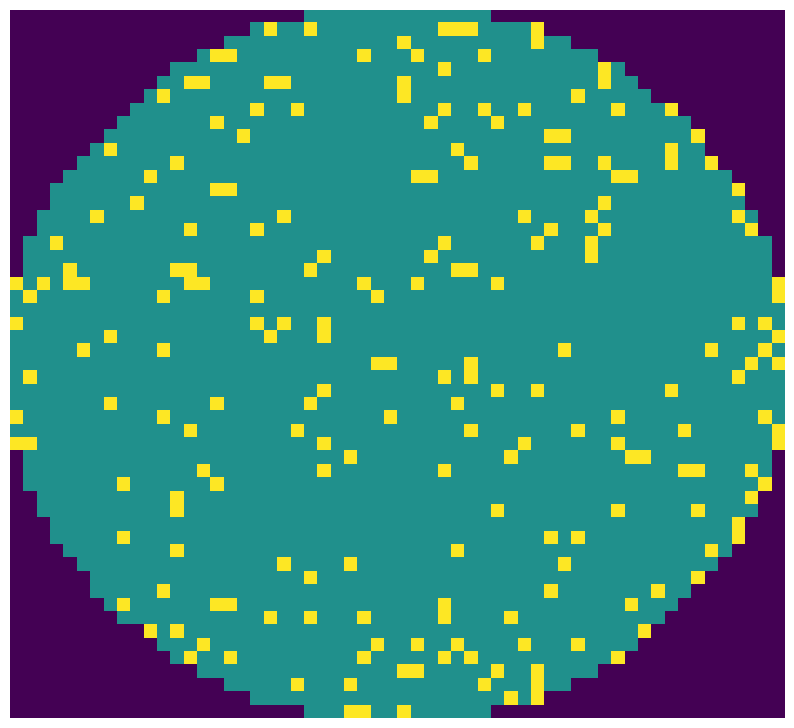

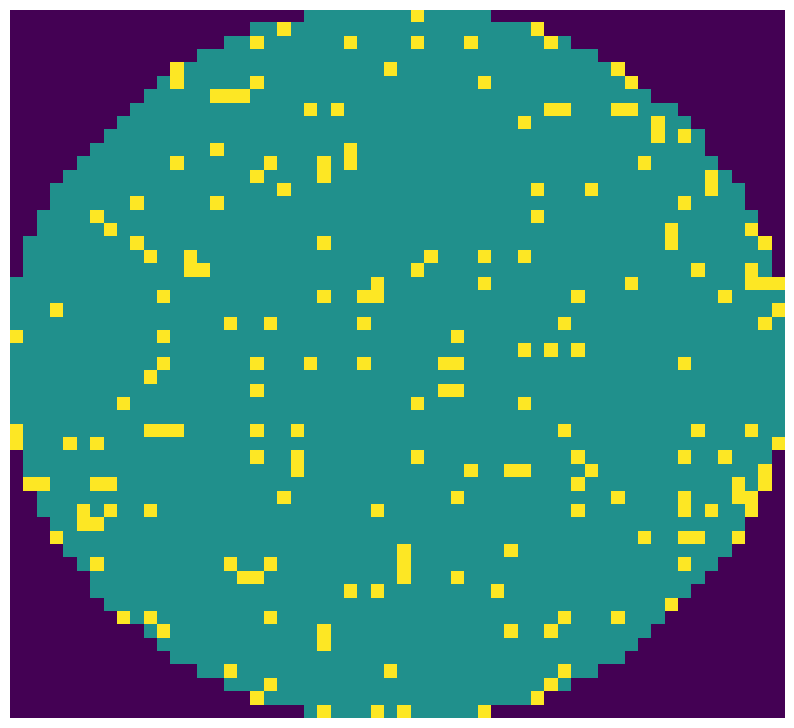

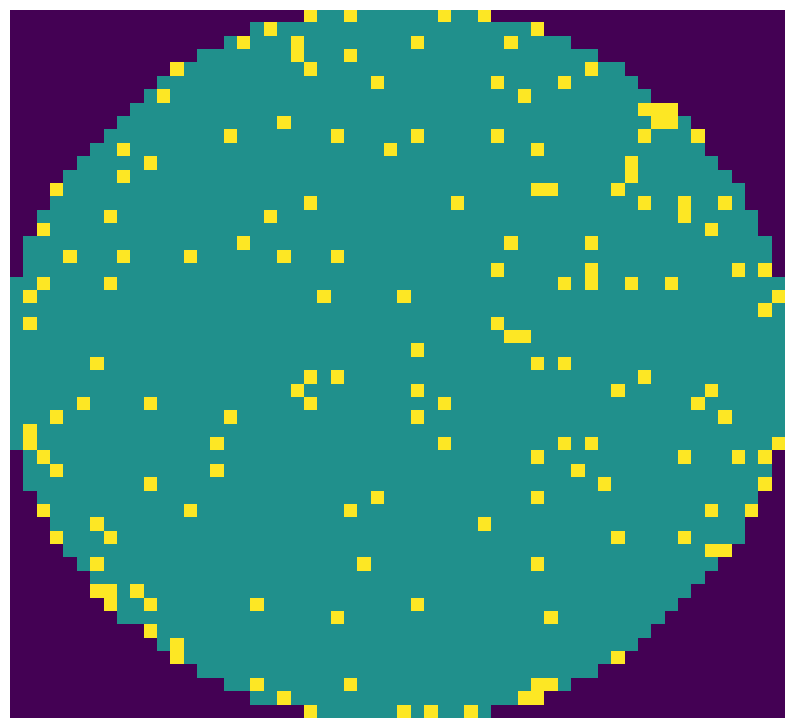

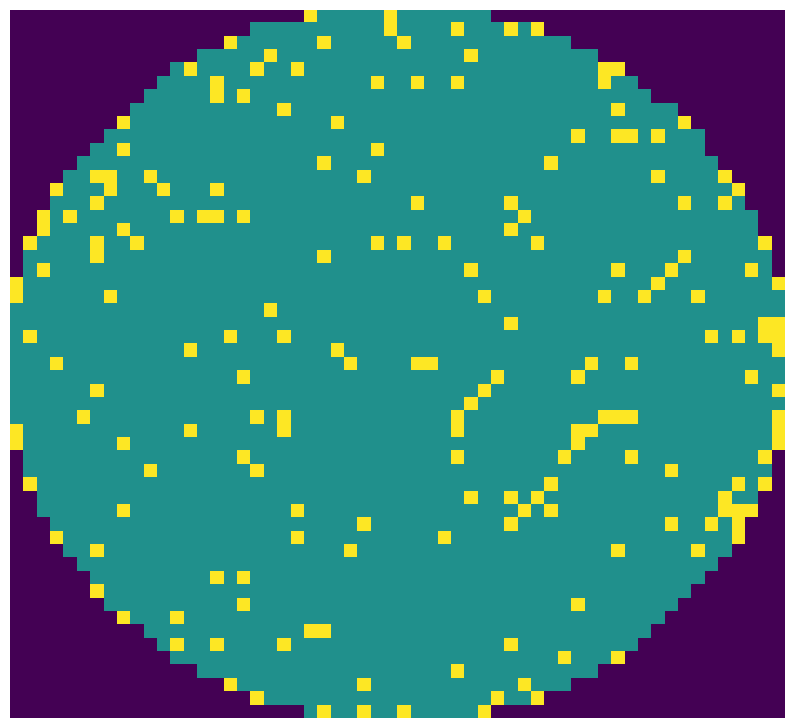

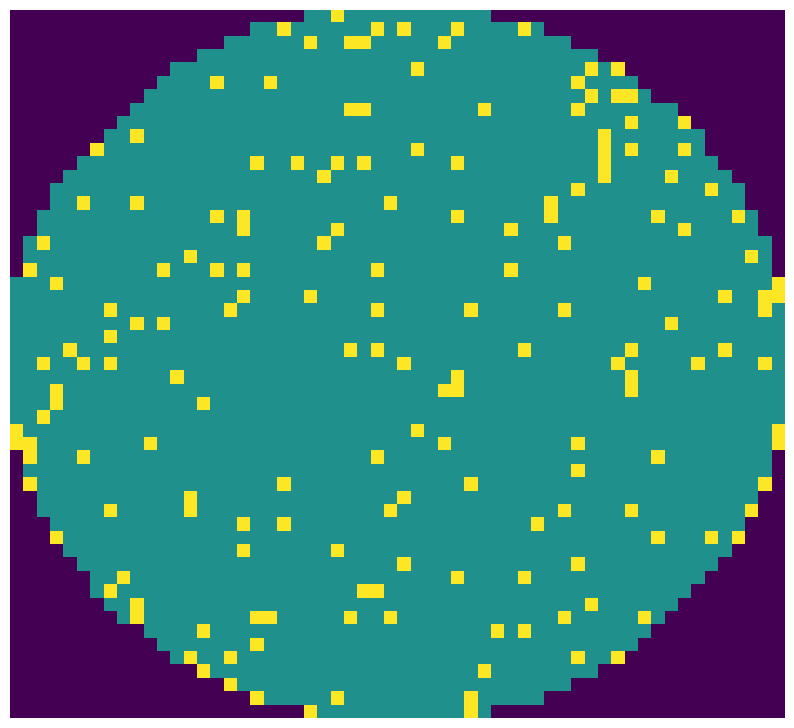

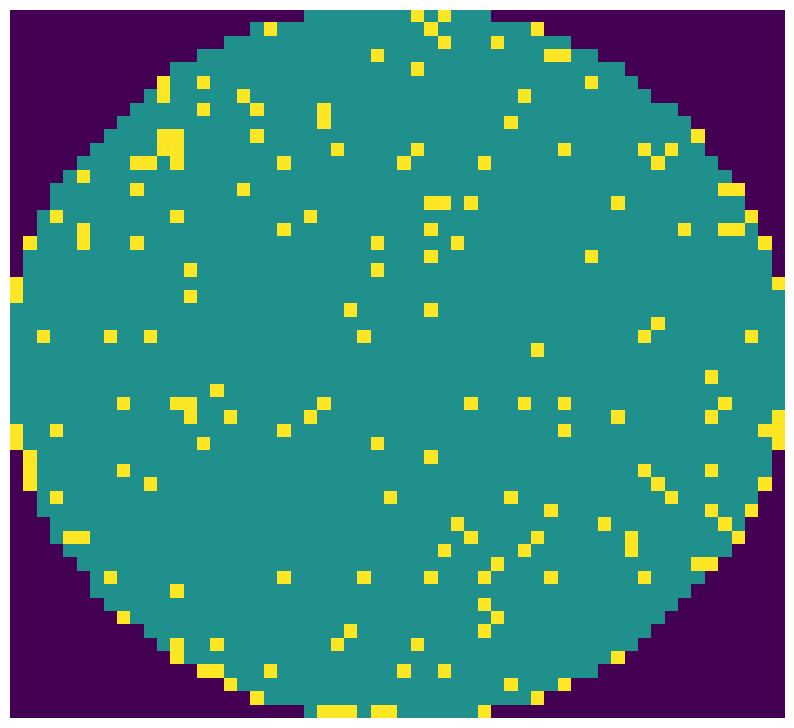

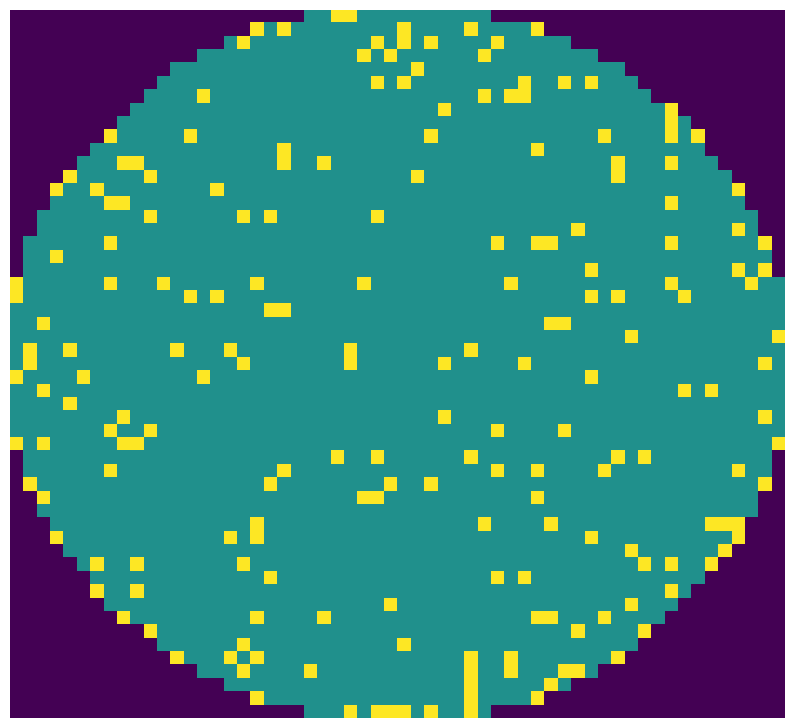

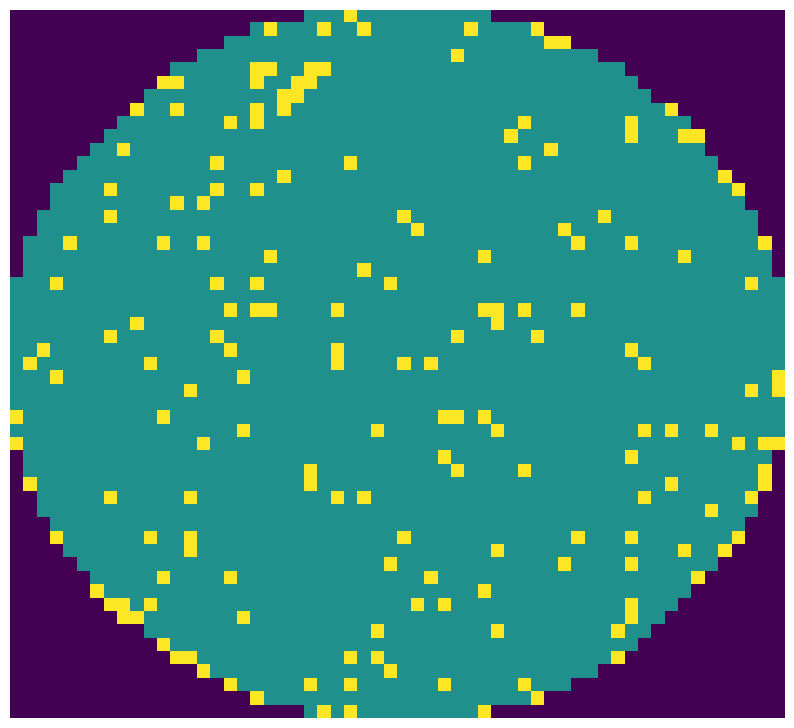

In [1]:
# 제목 : Wafer Bin Map 이미지 변환
# 목적 : WM811K.pkl 파일의 웨이퍼 데이터 이미지 변환 작업 수행
# 작성일 : 2025-07-17
# 최근 업데이트일 : 2025-07-17

# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm.notebook import tqdm
import gc
import shutil


# 웨이퍼 빈맵 데이터 불러오기
df = pd.read_pickle('/content/drive/MyDrive/ACK2025_Wafer/MIR_WM811K_Dataset/WM811K.pkl')


# 라벨 정규화
def normalize_label(x):
    if isinstance(x, np.ndarray):
        return str(x[0])
    elif isinstance(x, (list, tuple)):
        return str(x[0])
    else:
        return str(x)



df['trainTestLabel'] = df['trainTestLabel'].apply(normalize_label)
df['failureType'] = df['failureType'].apply(normalize_label)


# 출력 폴더 설정
output_root = '/content/drive/MyDrive/ACK2025_Wafer/MIR_WM811K_Dataset/WBM_Image_Dataset'
os.makedirs(output_root, exist_ok=True)


# 웨이퍼 맵 Viridis 이미지 변환 및 640x640 크기로 저장하는 함수
def save_wafer_map_image(array, save_path, size = (640,640)):

    # 1. 웨이퍼 맵 시각화
    plt.figure(figsize=(10,10)) # figsize(10,10): 고해상도 저장
    plt.axis('off')
    plt.imshow(array, cmap = 'viridis',interpolation='nearest') # Die 간 경계를 선명하게 유지 (흐림 방지)

    # 2. 임시 저장
    temp_path = "temp.png"
    plt.savefig(temp_path, bbox_inches='tight', pad_inches=0, dpi=300)  # dpi300 : 이미지 선명도 확보
    plt.close

    # 3. Resize 및 최종 저장
    img = Image.open(temp_path).convert('RGB')
    img = img.resize(size, Image.LANCZOS)   # 640x640 크기 재조정
    img.save(save_path)
    img.close()
    os.remove(temp_path)
    gc.collect()



# tqdm으로 인한 진행 상황을 보여주며 저장
for i in tqdm(range(100)):
    label = df.iloc[i]['failureType']
    wafer = df.iloc[i]['waferMap']

    # 라벨 디렉터리 생성
    label_dir = os.path.join(output_root, label)
    os.makedirs(label_dir, exist_ok=True)

    # 저장 경로
    save_path = os.path.join(label_dir, f"{i}.png")

    # 저장
    save_wafer_map_image(wafer, save_path)



# 새 섹션